In [20]:
import deimos
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
import sys
sys.path.append("../src/")
sys.path.append("D:/metabolome_inference/metabolome_inference/src/")
from integrAitor import rawData,integrAitor,Classifier,Smoother,normalizeMatrix,safeNormalize
import detection_helper
import scipy.stats as stats
import seaborn as sb


In [21]:
datadir = "../data/mzMLs/"
resolution = 100


In [22]:
ms1ppm = 10
peakWidth = (15,83)
s2n = 2
noise = 10
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
peakList = pd.DataFrame(det.peakList)
peakList

mz  rt_start    rt_end isotope_xcms            adduct_xcms  \
1      68.995954  0.738486  0.756935          NaN                    NaN   
2      68.996105  0.948315  0.948315          NaN  [M-H-C5H8O4]- 202.048   
3      71.014253  0.984903  0.989476          NaN                    NaN   
4      71.014120  7.740167  7.744169          NaN        [M+Cl]- 36.0428   
5      71.014144  5.912456  5.916438          NaN                    NaN   
...          ...       ...       ...          ...                    ...   
5413  868.350668  4.713234  4.720345          NaN                    NaN   
5414  872.116647  6.582350  6.599948    [431][M]-     [M-2H+Na]- 851.139   
5415  873.119962  6.590824  6.608904  [431][M+1]-                    NaN   
5416  878.820516  8.815338  8.917312          NaN                    NaN   
5417  885.120741  8.303068  8.308650          NaN         [M-H]- 886.129   

      peak group  M3T.Std_neg_DDA_1mz.mzML  M3T.Std_neg_DDA_3mz.mzML  \
1            399             125500.017205             145428.903653   
2            229               3756.034596               4948.401458   
3            276              98038.502354             137598.752439   
4              9             375636.026246             430469.825578   
5            755             244631.664618             268449.114918   
...          ...                       ...                       ...   
5413        1568              17721.857497              27009.702575   
5414          33             155022.159191             176981.436507   
5415          33              40621.557094              39228.963579   
5416         195             172335.031717             335216.588857   
5417        2422              26995.024184              29451.483581   

      M3T.Std_neg_DDA_5mz.mzML  
1                190195.167147  
2                  8830.234237  
3                 76442.457325  
4                428057.439792  
5                266005.621005  
...                        ...  
5413              30205.486971  
5414             165159.185668  
5415              44046.065786  
5416             257736.863775  
5417              23614.289941  

[5417 rows x 9 columns]

In [23]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
print(files)
raw_data = {}
for file in files:
    temp = rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data[file] = temp
    

['M3T-Std_neg_DDA_1mz.mzML', 'M3T-Std_neg_DDA_3mz.mzML', 'M3T-Std_neg_DDA_5mz.mzML']


In [24]:
#format X
if __name__ == "__main__":
    integ = integrAitor(numCores = 10,resolution=resolution)
    rts = (peakList["rt_start"].values/2) + (peakList["rt_end"].values/2)
    X = integ.makeDataMatrix([raw_data[file] for file in files],peakList["mz"].values,
                             rts - .5,
                             rts +.5)
print(X.shape)

forming matrix |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
(16251, 100)


In [25]:
X_train,X_test = train_test_split(X,test_size=.2,shuffle=True)

In [26]:
if __name__ == "__main__":
    X_smoothed,_,_,_ = integ.curatePeaks(X_train)

fitting smoother...
Epoch 1/10
183/183 [==============================] - 5s 23ms/step - loss: 0.5312 - mean_absolute_error: 0.3828 - val_loss: 0.0593 - val_mean_absolute_error: 0.0121
Epoch 2/10
183/183 [==============================] - 4s 21ms/step - loss: 0.0575 - mean_absolute_error: 0.0106 - val_loss: 0.0541 - val_mean_absolute_error: 0.0076
Epoch 3/10
183/183 [==============================] - 4s 21ms/step - loss: 0.0538 - mean_absolute_error: 0.0072 - val_loss: 0.0521 - val_mean_absolute_error: 0.0049
Epoch 4/10
183/183 [==============================] - 4s 21ms/step - loss: 0.0518 - mean_absolute_error: 0.0044 - val_loss: 0.0515 - val_mean_absolute_error: 0.0041
Epoch 5/10
183/183 [==============================] - 4s 21ms/step - loss: 0.0515 - mean_absolute_error: 0.0039 - val_loss: 0.0512 - val_mean_absolute_error: 0.0037
Epoch 6/10
183/183 [==============================] - 4s 21ms/step - loss: 0.0512 - mean_absolute_error: 0.0035 - val_loss: 0.0509 - val_mean_absolute_erro

545/545 [==============================] - 3s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0034 - val_loss: 0.0163 - val_mean_absolute_error: 0.0049
Epoch 10/10
545/545 [==============================] - 3s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0034 - val_loss: 0.0106 - val_mean_absolute_error: 0.0028
round 5: 241 unclassified features
Epoch 1/10
546/546 [==============================] - 4s 5ms/step - loss: 0.6918 - mean_absolute_error: 0.4979 - val_loss: 0.7196 - val_mean_absolute_error: 0.5257
Epoch 2/10
546/546 [==============================] - 3s 5ms/step - loss: 0.6036 - mean_absolute_error: 0.4052 - val_loss: 0.4660 - val_mean_absolute_error: 0.2696
Epoch 3/10
546/546 [==============================] - 3s 5ms/step - loss: 0.2630 - mean_absolute_error: 0.1038 - val_loss: 0.1282 - val_mean_absolute_error: 0.0385
Epoch 4/10
546/546 [==============================] - 3s 5ms/step - loss: 0.0798 - mean_absolute_error: 0.0199 - val_loss: 0.0530 - val_mean_absolute_error

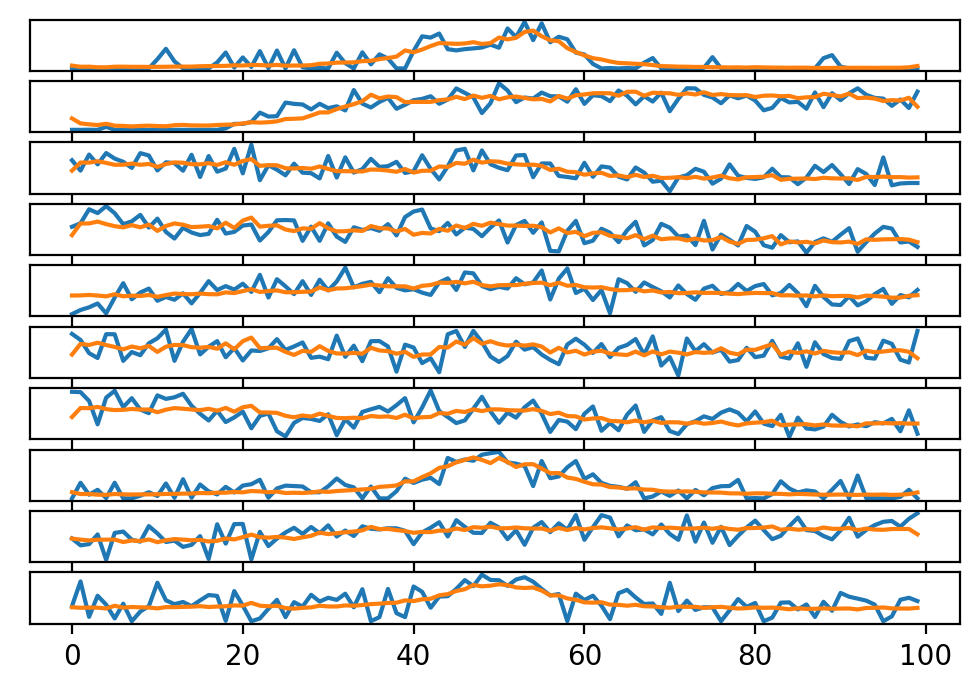

In [27]:
randomInts = rd.sample(list(range(len(X_train))),k=10)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(safeNormalize(X_train[x]),label="original")
    ax.plot(X_smoothed[x],label="output")
    ax.set_yticks([],[])
    #ax.legend()

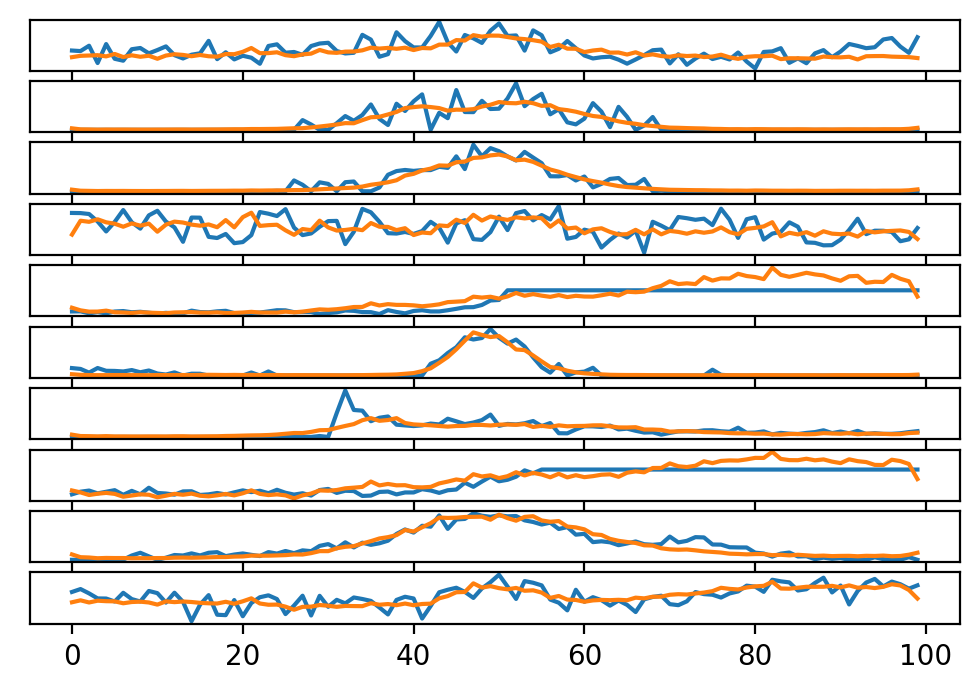

In [28]:
randomInts = rd.sample(list(range(len(X_test))),k=10)
fig, axes = plt.subplots(10,1)
X_test_smoothed = integ.smoother.predict(normalizeMatrix(X_test))
for x,ax in zip(randomInts,axes):
    ax.plot(safeNormalize(X_test[x]),label="original")
    ax.plot(X_test_smoothed[x],label="output")
    ax.set_yticks([],[])
    #ax.legend()

In [29]:
if __name__ == "__main__":
    X_smoothed,tics,y,progress = integ.curatePeaks(X)

fitting smoother...
Epoch 1/10
229/229 [==============================] - 6s 22ms/step - loss: 0.4015 - mean_absolute_error: 0.2850 - val_loss: 0.0525 - val_mean_absolute_error: 0.0095
Epoch 2/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0546 - mean_absolute_error: 0.0074 - val_loss: 0.0497 - val_mean_absolute_error: 0.0069
Epoch 3/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0527 - mean_absolute_error: 0.0051 - val_loss: 0.0484 - val_mean_absolute_error: 0.0051
Epoch 4/10
229/229 [==============================] - 5s 21ms/step - loss: 0.0520 - mean_absolute_error: 0.0040 - val_loss: 0.0481 - val_mean_absolute_error: 0.0047
Epoch 5/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0519 - mean_absolute_error: 0.0038 - val_loss: 0.0480 - val_mean_absolute_error: 0.0046
Epoch 6/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0518 - mean_absolute_error: 0.0037 - val_loss: 0.0479 - val_mean_absolute_erro

681/681 [==============================] - 2s 3ms/step - loss: 0.0114 - mean_absolute_error: 0.0028 - val_loss: 0.0080 - val_mean_absolute_error: 0.0026
Epoch 10/10
681/681 [==============================] - 3s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0027 - val_loss: 0.0099 - val_mean_absolute_error: 0.0036
round 5: 301 unclassified features
Epoch 1/10
682/682 [==============================] - 4s 4ms/step - loss: 0.6625 - mean_absolute_error: 0.4669 - val_loss: 0.6664 - val_mean_absolute_error: 0.4690
Epoch 2/10
682/682 [==============================] - 3s 4ms/step - loss: 0.3890 - mean_absolute_error: 0.2014 - val_loss: 0.2529 - val_mean_absolute_error: 0.0979
Epoch 3/10
682/682 [==============================] - 3s 4ms/step - loss: 0.1149 - mean_absolute_error: 0.0301 - val_loss: 0.0697 - val_mean_absolute_error: 0.0156
Epoch 4/10
682/682 [==============================] - 3s 4ms/step - loss: 0.0414 - mean_absolute_error: 0.0094 - val_loss: 0.0369 - val_mean_absolute_error

[16251, 683, 406, 346, 301]


Text(0, 0.5, 'log10(# of uncertain peaks)')

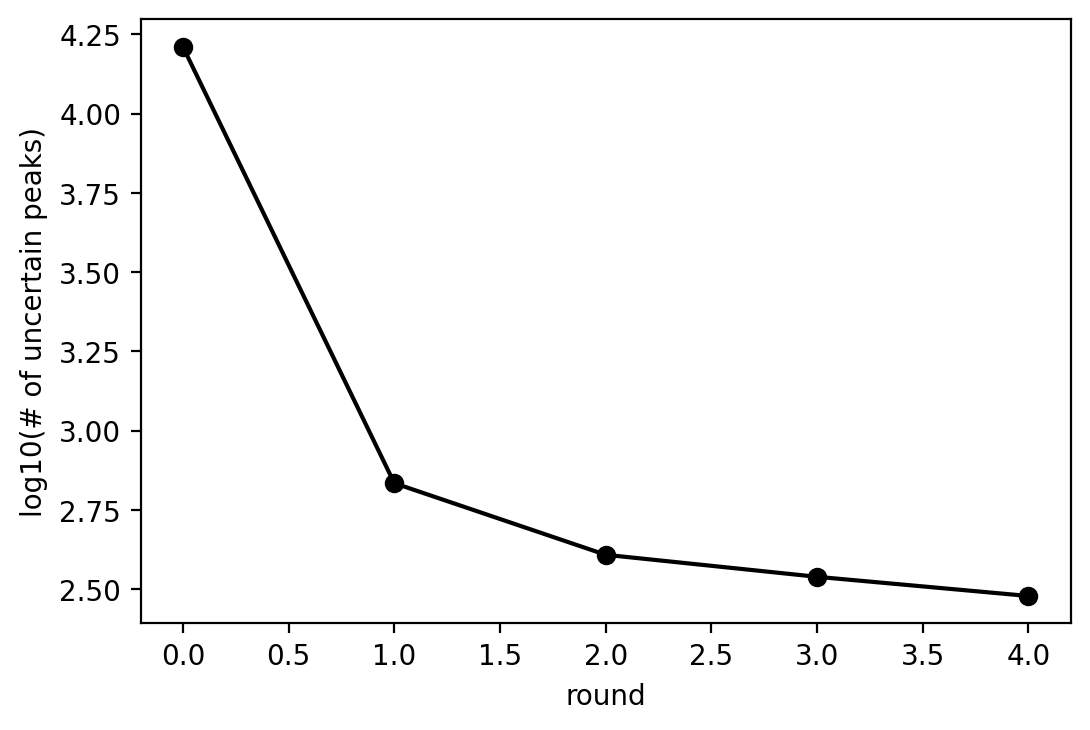

In [30]:
print(progress)
plt.plot(list(range(len(progress))),np.log10(progress),color="black")
plt.scatter(list(range(len(progress))),np.log10(progress),color="black")
plt.xlabel("round")
plt.ylabel("log10(# of uncertain peaks)")

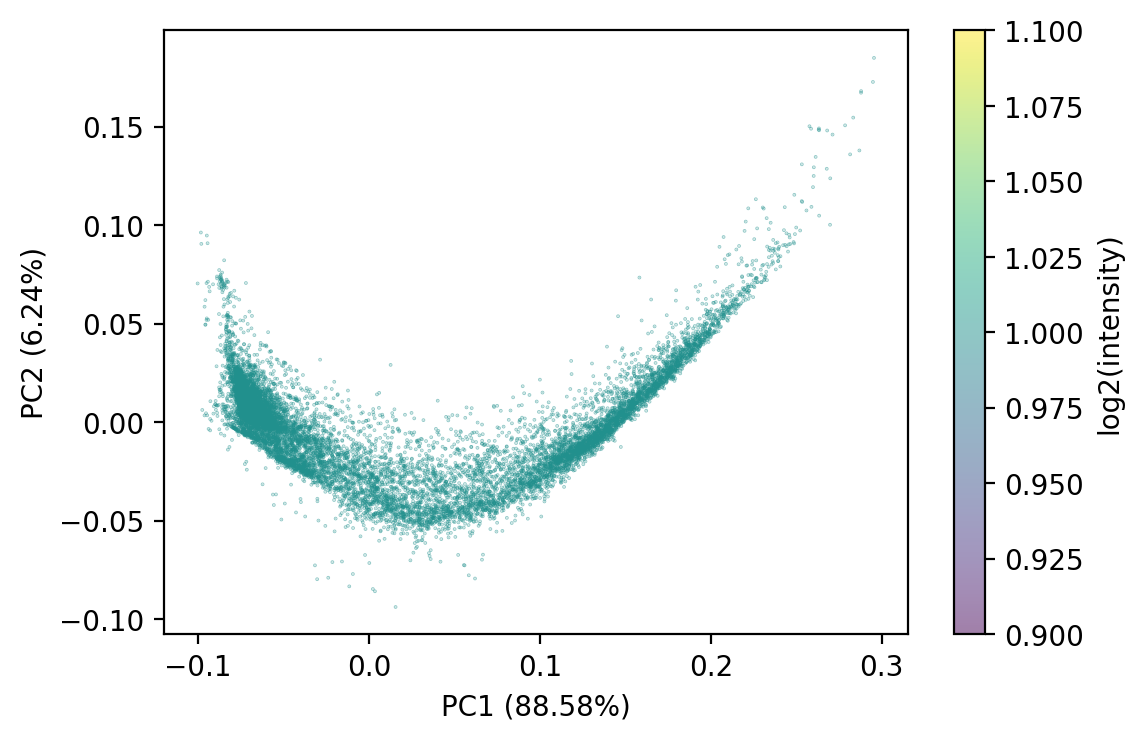

In [31]:
pca = PCA(2)
loads = pca.fit_transform(X_smoothed)
plt.scatter(loads[:,0],loads[:,1],c=tics,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log2(intensity)")

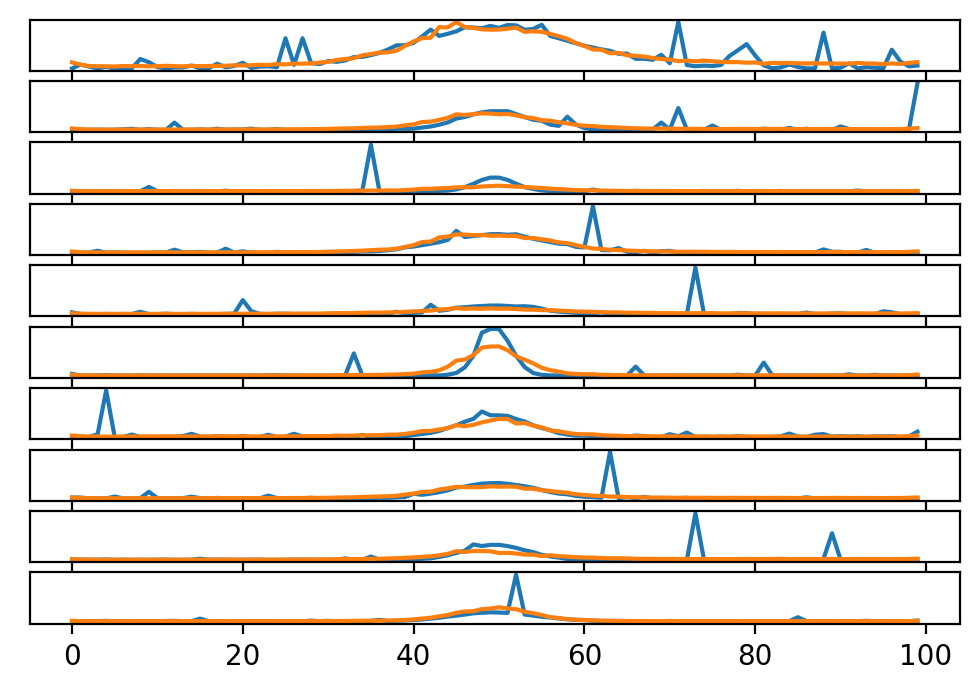

In [32]:
randomInts = rd.sample(list(range(len(X))),k=10)
X_signal,_ = integ.generateSignalPeaks(X,tics)
X_signal_smoothed = integ.smoother.predict(X_signal)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_signal[x],label="original")
    ax.plot(X_signal_smoothed[x],label="output")
    ax.set_yticks([],[])


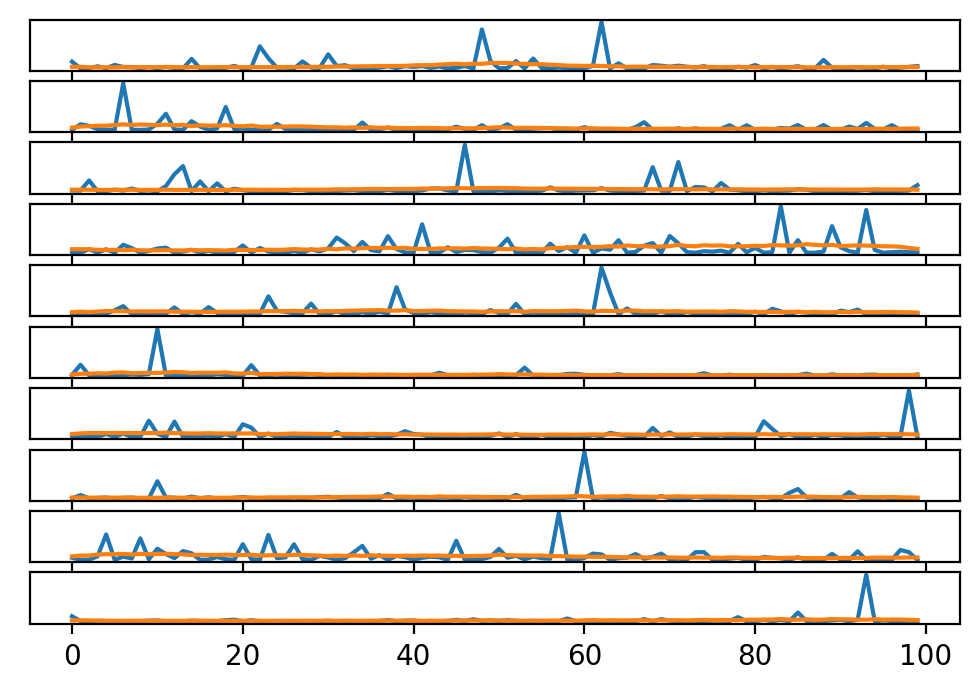

In [33]:
randomInts = rd.sample(list(range(len(X))),k=10)
X_noise,_ = integ.generateNoisePeaks(X,tics)
X_noise_smoothed = integ.smoother.predict(X_noise)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_noise[x],label="original")
    ax.plot(X_noise_smoothed[x],label="output")
    ax.set_yticks([],[])


[0.12702354 0.04925118]


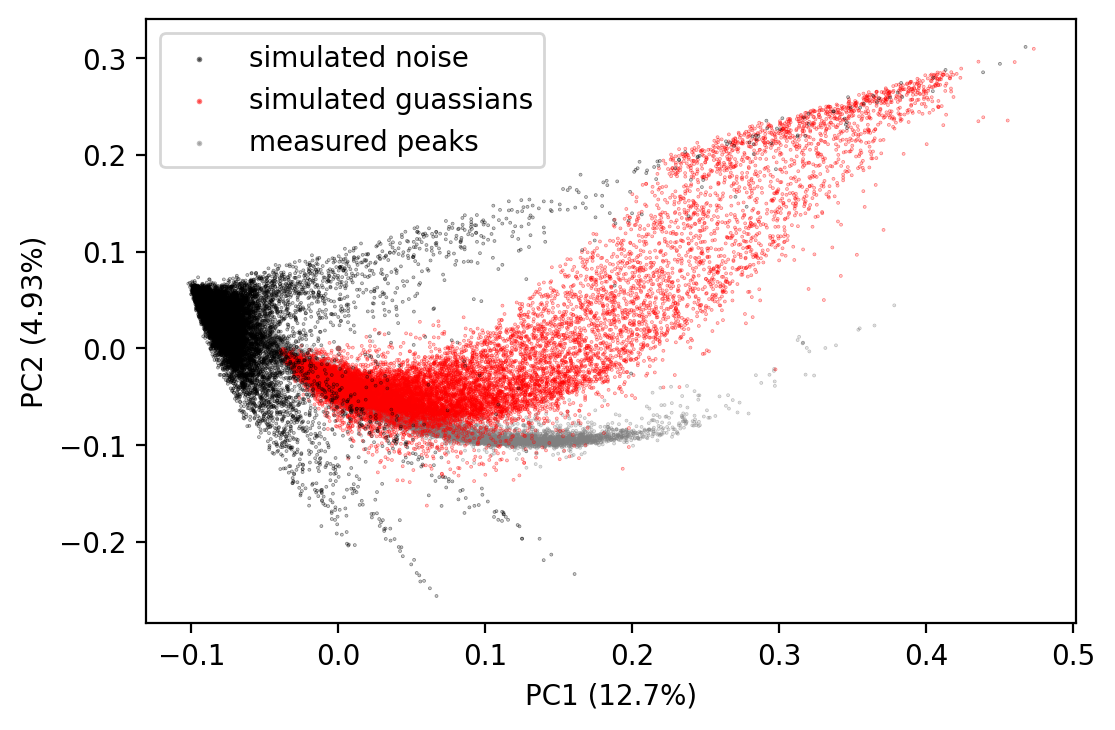

In [38]:
tmp = np.concatenate((X_smoothed,normalizeMatrix(X_signal),normalizeMatrix(X_noise)))
cs = ["grey" for _ in X] + ["red" for _ in X_signal] + ["black" for _ in X_noise]
loads = pca.fit_transform(tmp)
print(pca.explained_variance_ratio_[:2])
def getColor(s):
    if s < 0.01:
        return "black"
    if s > 0.99:
        return "red"
    else:
        return "grey"
plt.scatter([0],[0],color="black",label="simulated noise",s=1,alpha=.5)
plt.scatter([0],[0],color="red",label="simulated guassians",s=1,alpha=.5)
plt.scatter([0],[0],color="grey",label="measured peaks",s=1,alpha=.5)

plt.scatter(loads[:,0],loads[:,1],s=.1,alpha=.5,c=cs)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.legend()

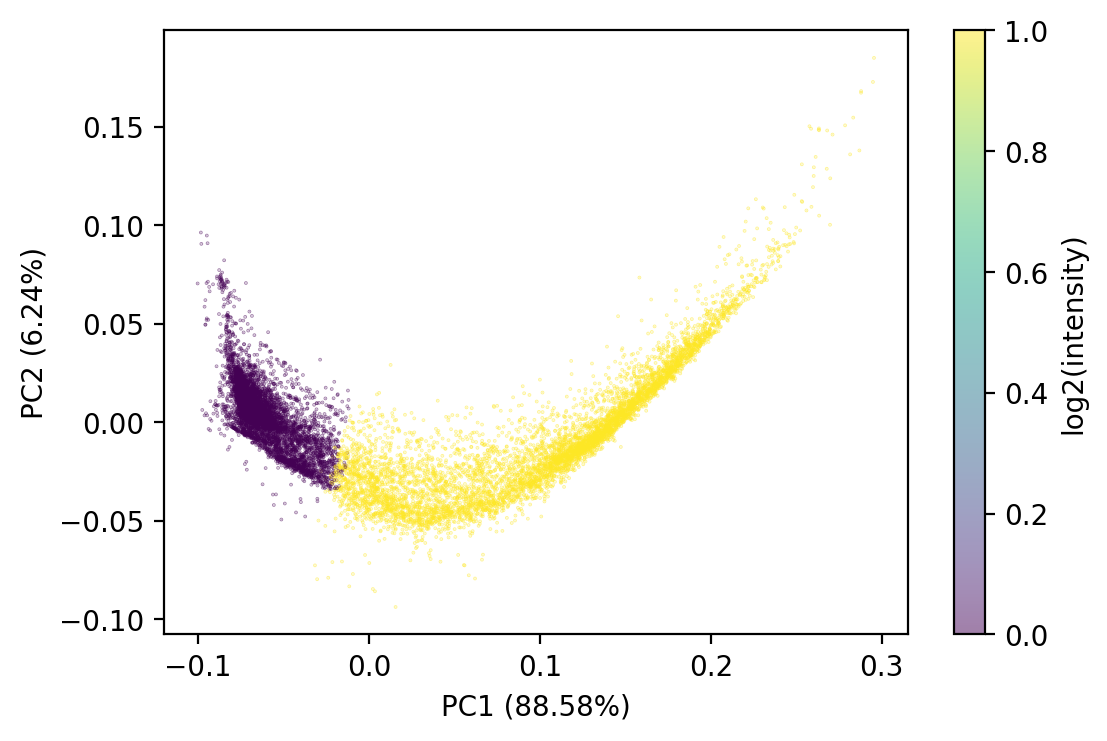

In [39]:
pca = PCA(2)
loads = pca.fit_transform(X_smoothed)
plt.scatter(loads[:,0],loads[:,1],c=y,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log2(intensity)")

In [43]:
ms1_peaks_curated = {file:[] for file in files}
keys = []
for file in files:
    for index in peakList.index.values:
        keys.append([file,index])
for [file,index],score in zip(keys,y):
    if score > .5:
        ms1_peaks_curated[file].append(index)
ms1_peaks_curated = {file:peakList.loc[ms1_peaks_curated[file],:] for file in files}
ms1_peaks_curated[file]

mz   rt_start     rt_end isotope_xcms         adduct_xcms  \
4      71.014120   7.740167   7.744169          NaN     [M+Cl]- 36.0428   
7      71.014076   5.389264   5.400897          NaN                 NaN   
8      71.014261   1.813514   1.829121          NaN  [M-H-CO2]- 116.012   
11     72.009448   3.615488   3.624731          NaN                 NaN   
12     72.970115  13.831540  13.856765          NaN                 NaN   
...          ...        ...        ...          ...                 ...   
5412  868.191608   3.366705   3.407427          NaN                 NaN   
5413  868.350668   4.713234   4.720345          NaN                 NaN   
5414  872.116647   6.582350   6.599948    [431][M]-  [M-2H+Na]- 851.139   
5415  873.119962   6.590824   6.608904  [431][M+1]-                 NaN   
5417  885.120741   8.303068   8.308650          NaN      [M-H]- 886.129   

      peak group  M3T.Std_neg_DDA_1mz.mzML  M3T.Std_neg_DDA_3mz.mzML  \
4              9             375636.026246             430469.825578   
7             11             373178.565606             401838.861572   
8             31             136483.208387             127856.130990   
11          1460              20499.406078              19911.528048   
12          1136              46436.115068              51166.070930   
...          ...                       ...                       ...   
5412           7              34350.564418              63126.152562   
5413        1568              17721.857497              27009.702575   
5414          33             155022.159191             176981.436507   
5415          33              40621.557094              39228.963579   
5417        2422              26995.024184              29451.483581   

      M3T.Std_neg_DDA_5mz.mzML  
4                428057.439792  
7                357791.824358  
8                114403.778260  
11                17024.859452  
12                45550.883164  
...                        ...  
5412              52414.589071  
5413              30205.486971  
5414             165159.185668  
5415              44046.065786  
5417              23614.289941  

[2161 rows x 9 columns]

Text(0, 0.5, '% of features')

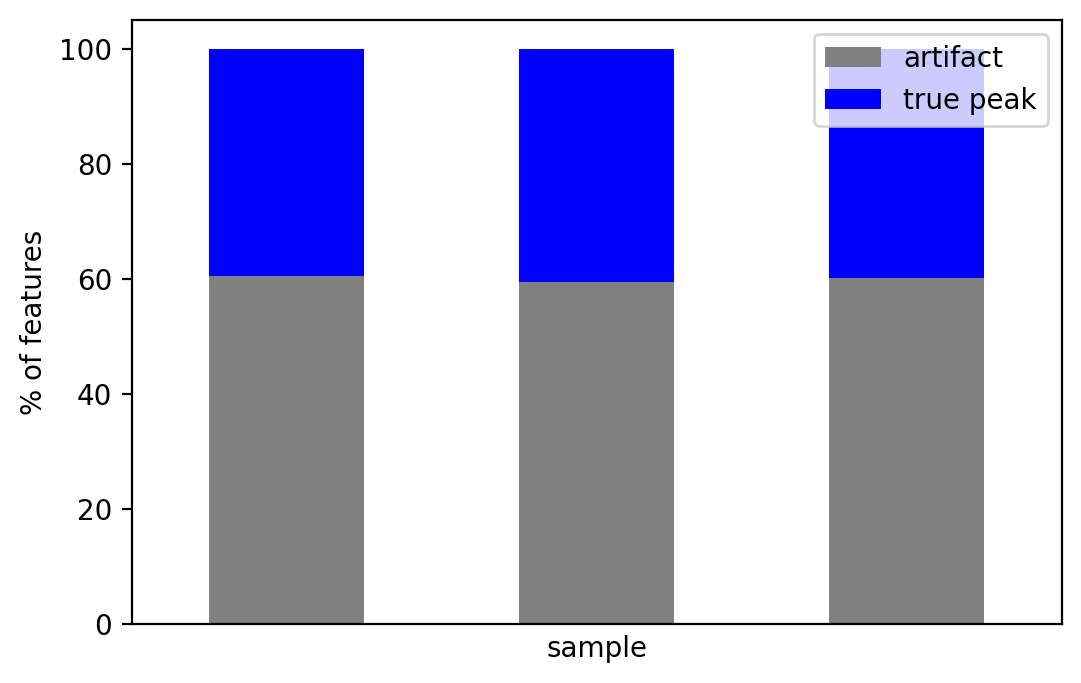

In [46]:
df = {}
for file in files:
    for index,row in peakList.iterrows():
        if index in ms1_peaks_curated[file].index.values:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

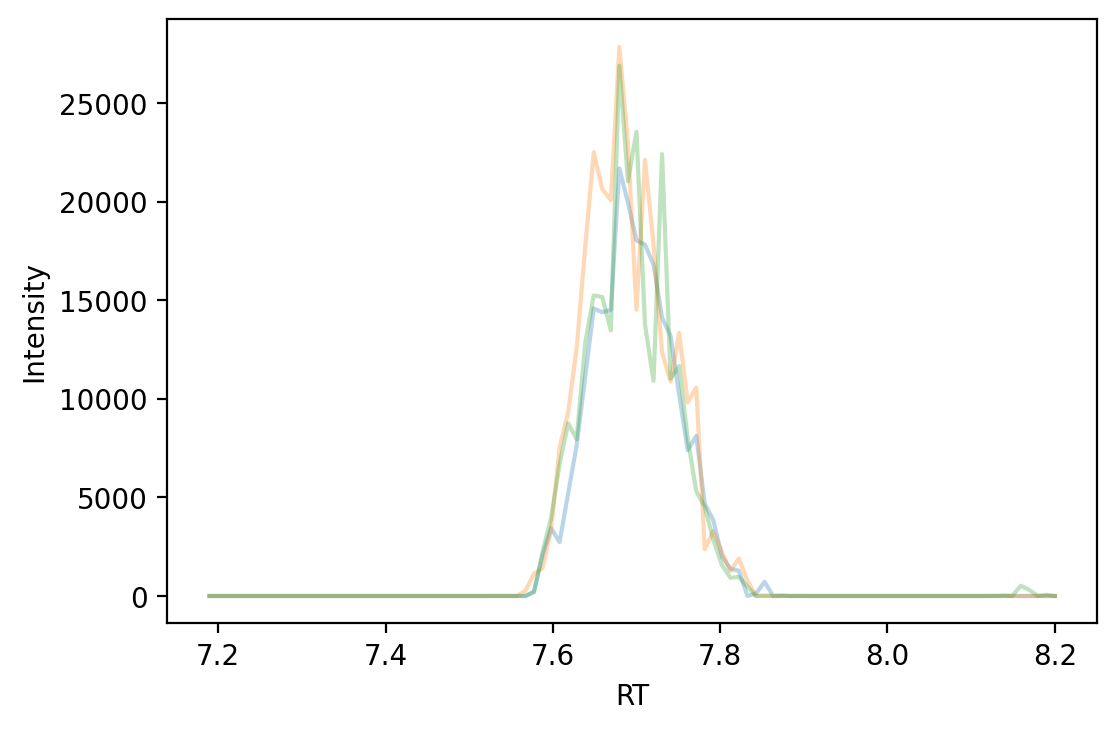

In [49]:
file = files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
for i in inds:
    if i in ms1_peaks_curated[file].index.values:
        integ.plot_overlayedEIC([raw_data[f] for f in files],ms1_peaks_curated[file].at[i,"mz"],ms1_peaks_curated[file].at[i,"rt_start"]-.5,ms1_peaks_curated[file].at[i,"rt_end"]+.5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

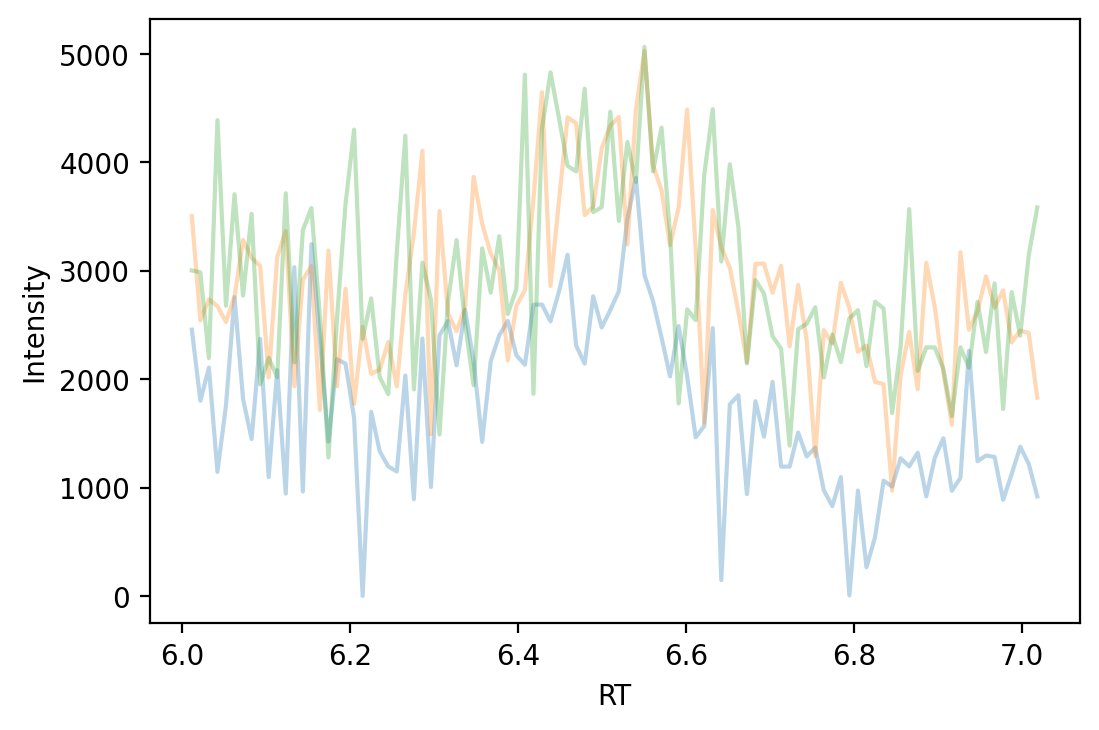

In [50]:
file = files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
for i in inds:
    if i not in ms1_peaks_curated[file].index.values:
        integ.plot_overlayedEIC([raw_data[f] for f in files],peakList.at[i,"mz"],peakList.at[i,"rt_start"]-.5,peakList.at[i,"rt_end"] + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

In [51]:
real_peaks = pd.read_csv("../data/peaks_neg_m3t.csv")
real_peaks

Unnamed: 0                                     Name  rt_start  rt_end  \
0            0                Fructose 1,6-bisphosphate      8.97    9.57   
1            1                              Citric acid      8.88    9.22   
2            2                          Acetoacetyl-CoA      6.39    6.87   
3            3                               Acetyl-CoA      6.31    6.75   
4            4                          Chelidamic Acid      6.85    7.46   
..         ...                                      ...       ...     ...   
66          70                                   URACIL      1.90    2.46   
67          71                                  URIDINE      2.94    3.59   
68          72  URIDINE DIPHOSPHATE-N-ACETYLGLUCOSAMINE      7.20    7.56   
69          73                                   VALINE      4.78    5.30   
70          74                             OXOGLUTARATE      7.25    7.59   

           CAS                     InChiKey  pubchemID mzCloudID  \
0     488-69-7  RNBGYGVWRKECFJ-ZXXMMSQZSA-N     445557        -1   
1      77-92-9  KRKNYBCHXYNGOX-UHFFFAOYSA-N        311      r352   
2    1420-36-6  OJFDKHTZOUZBOS-CITAKDKDSA-N      92153        -1   
3      72-89-9  ZSLZBFCDCINBPY-ZSJPKINUSA-N     444493     r4596   
4     499-51-4  XTLJJHGQACAZMS-UHFFFAOYSA-N       8743        -1   
..         ...                          ...        ...       ...   
66     66-22-8  ISAKRJDGNUQOIC-UHFFFAOYSA-N       1174     r2531   
67     58-96-8  DRTQHJPVMGBUCF-XVFCMESISA-N       6029     r1408   
68    528-04-1  LFTYTUAZOPRMMI-CFRASDGPSA-N     445675     r2920   
69     72-18-4  KZSNJWFQEVHDMF-BYPYZUCNSA-N       6287      r772   
70  22202-68-2  KPGXRSRHYNQIFN-UHFFFAOYSA-N         51      r305   

           formula          mz  
0       C6H14O12P2  338.988774  
1           C6H8O7  191.019727  
2   C25H40N7O18P3S  850.129063  
3   C23H38N7O17P3S  808.118499  
4          C7H5NO5  182.009496  
..             ...         ...  
66        C4H4N2O2  111.020001  
67       C9H12N2O6  243.062260  
68   C17H27N3O17P2  606.074295  
69        C5H11NO2  116.071703  
70          C5H6O5  145.014247  

[71 rows x 10 columns]

In [52]:
real_peaks = [[row["mz"],row["rt_start"]/2+row["rt_end"]/2,row["Name"]] for index,row in real_peaks.iterrows()]

In [53]:
plt_dict = {}
ppmTol = 5
rtTol = .5
for file in files: 
    
        
    numDetected = 0
    detectedPeaks = []
    undetectedPeaks = []

    for mz,rt,name in real_peaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        for index,row in peakList.iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-(row["rt_start"]/2 + row["rt_end"]/2)) < rtTol:
                    numDetected += 1
                    found = True
                    detectedPeaks.append([mz,rt,name])
                    break
        if not found:
            undetectedPeaks.append([mz,rt,name])
    
    numFound = 0
    
    for mz,rt,name in detectedPeaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        
        for index,row in ms1_peaks_curated[file].iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-(row["rt_start"]/2 + row["rt_end"]/2)) < rtTol:
                    found = True
                    break
        if found:
             plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"true peak","sample" : file}
        else:
             plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"artifact","sample" : file}
    for mz,rt,name in undetectedPeaks:
        plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"undetected","sample" : file}
    
   
df = pd.DataFrame.from_dict(plt_dict,orient="index")

In [54]:
df

metabolite classification                    sample
0    Fructose 1,6-bisphosphate      true peak  M3T-Std_neg_DDA_1mz.mzML
1                  Citric acid       artifact  M3T-Std_neg_DDA_1mz.mzML
2              Acetoacetyl-CoA      true peak  M3T-Std_neg_DDA_1mz.mzML
3                   Acetyl-CoA      true peak  M3T-Std_neg_DDA_1mz.mzML
4              Chelidamic Acid      true peak  M3T-Std_neg_DDA_1mz.mzML
..                         ...            ...                       ...
208                   PYRUVATE     undetected  M3T-Std_neg_DDA_5mz.mzML
209           SELENOMETHIONINE     undetected  M3T-Std_neg_DDA_5mz.mzML
210                 TRYPTOPHAN     undetected  M3T-Std_neg_DDA_5mz.mzML
211                     URACIL     undetected  M3T-Std_neg_DDA_5mz.mzML
212                     VALINE     undetected  M3T-Std_neg_DDA_5mz.mzML

[213 rows x 3 columns]

In [55]:
misClass = df[df["classification"] == "artifact"]
misClass

metabolite classification                    sample
1     Citric acid       artifact  M3T-Std_neg_DDA_1mz.mzML
7         Glucose       artifact  M3T-Std_neg_DDA_1mz.mzML
14      L-ALANINE       artifact  M3T-Std_neg_DDA_1mz.mzML
17   BETA-ALANINE       artifact  M3T-Std_neg_DDA_1mz.mzML
26      HISTIDINE       artifact  M3T-Std_neg_DDA_1mz.mzML
28     ISOCITRATE       artifact  M3T-Std_neg_DDA_1mz.mzML
29     ISOLEUCINE       artifact  M3T-Std_neg_DDA_1mz.mzML
30        LEUCINE       artifact  M3T-Std_neg_DDA_1mz.mzML
72    Citric acid       artifact  M3T-Std_neg_DDA_3mz.mzML
78        Glucose       artifact  M3T-Std_neg_DDA_3mz.mzML
85      L-ALANINE       artifact  M3T-Std_neg_DDA_3mz.mzML
88   BETA-ALANINE       artifact  M3T-Std_neg_DDA_3mz.mzML
97      HISTIDINE       artifact  M3T-Std_neg_DDA_3mz.mzML
99     ISOCITRATE       artifact  M3T-Std_neg_DDA_3mz.mzML
100    ISOLEUCINE       artifact  M3T-Std_neg_DDA_3mz.mzML
101       LEUCINE       artifact  M3T-Std_neg_DDA_3mz.mzML
143   Citric acid       artifact  M3T-Std_neg_DDA_5mz.mzML
149       Glucose       artifact  M3T-Std_neg_DDA_5mz.mzML
156     L-ALANINE       artifact  M3T-Std_neg_DDA_5mz.mzML
159  BETA-ALANINE       artifact  M3T-Std_neg_DDA_5mz.mzML
168     HISTIDINE       artifact  M3T-Std_neg_DDA_5mz.mzML
170    ISOCITRATE       artifact  M3T-Std_neg_DDA_5mz.mzML
171    ISOLEUCINE       artifact  M3T-Std_neg_DDA_5mz.mzML
172       LEUCINE       artifact  M3T-Std_neg_DDA_5mz.mzML

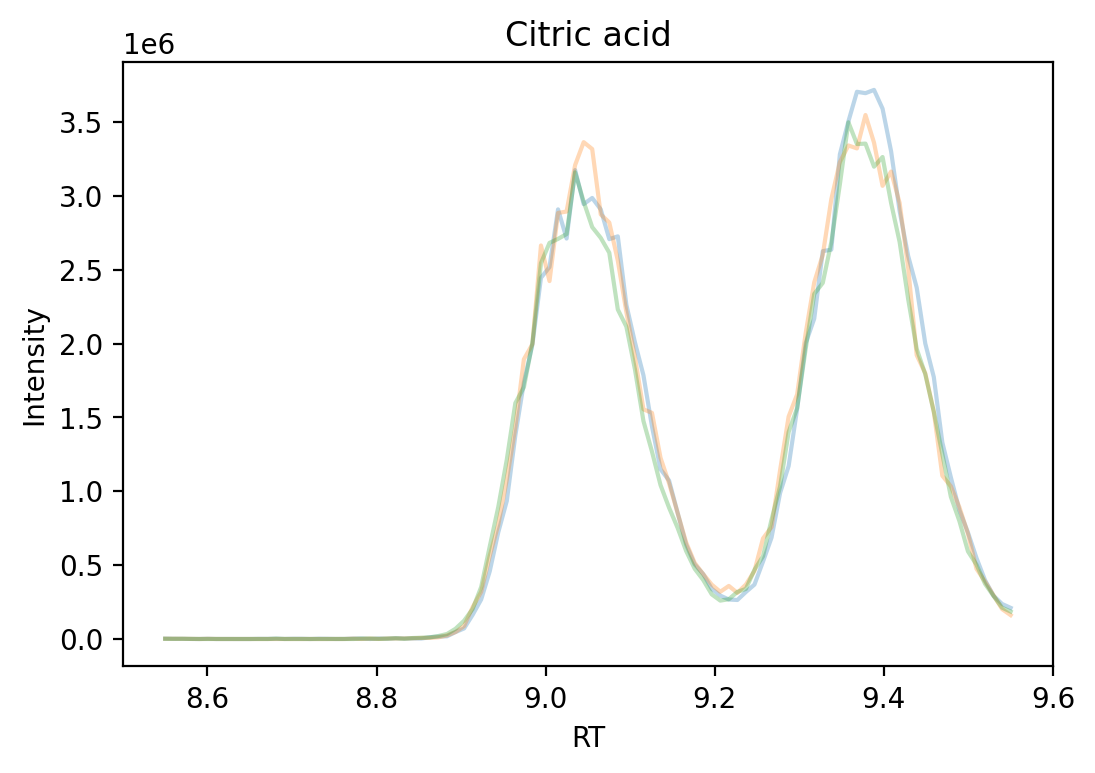

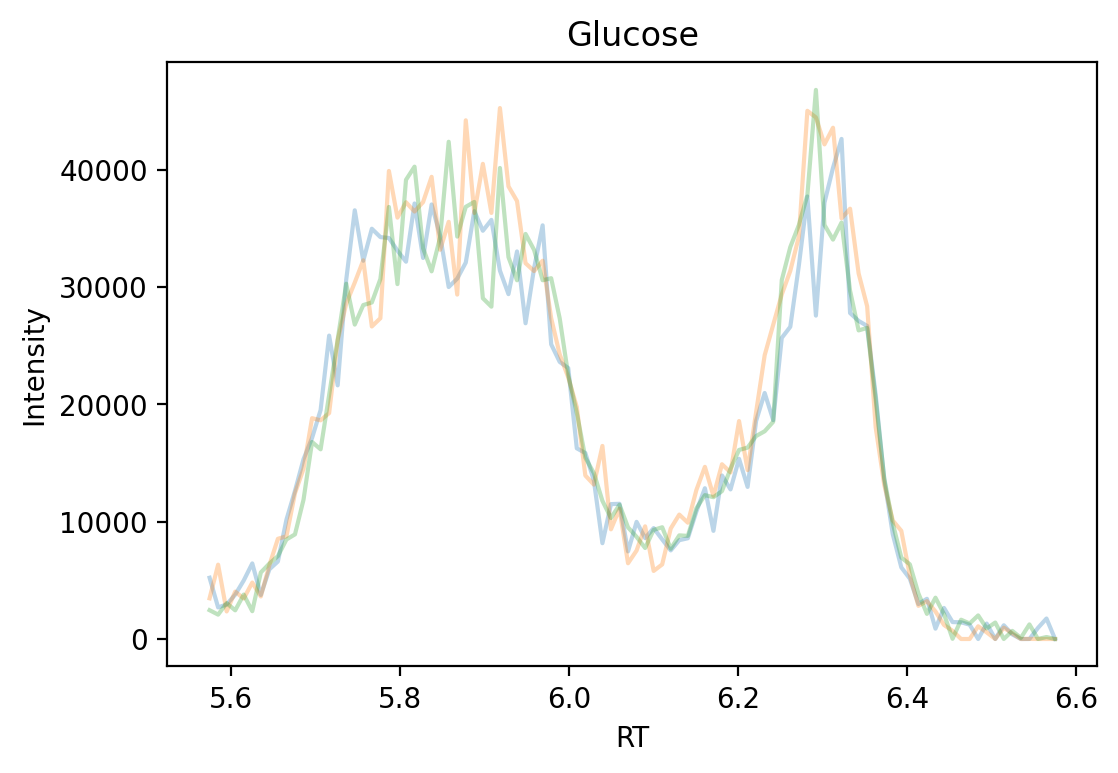

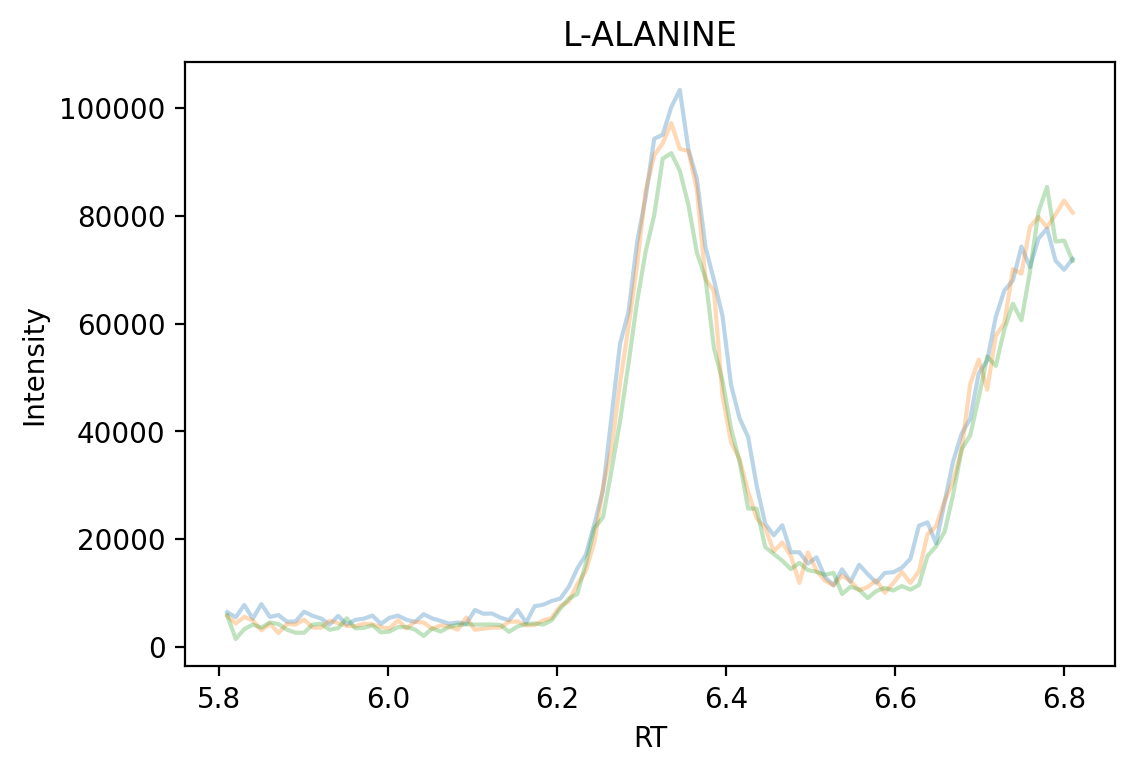

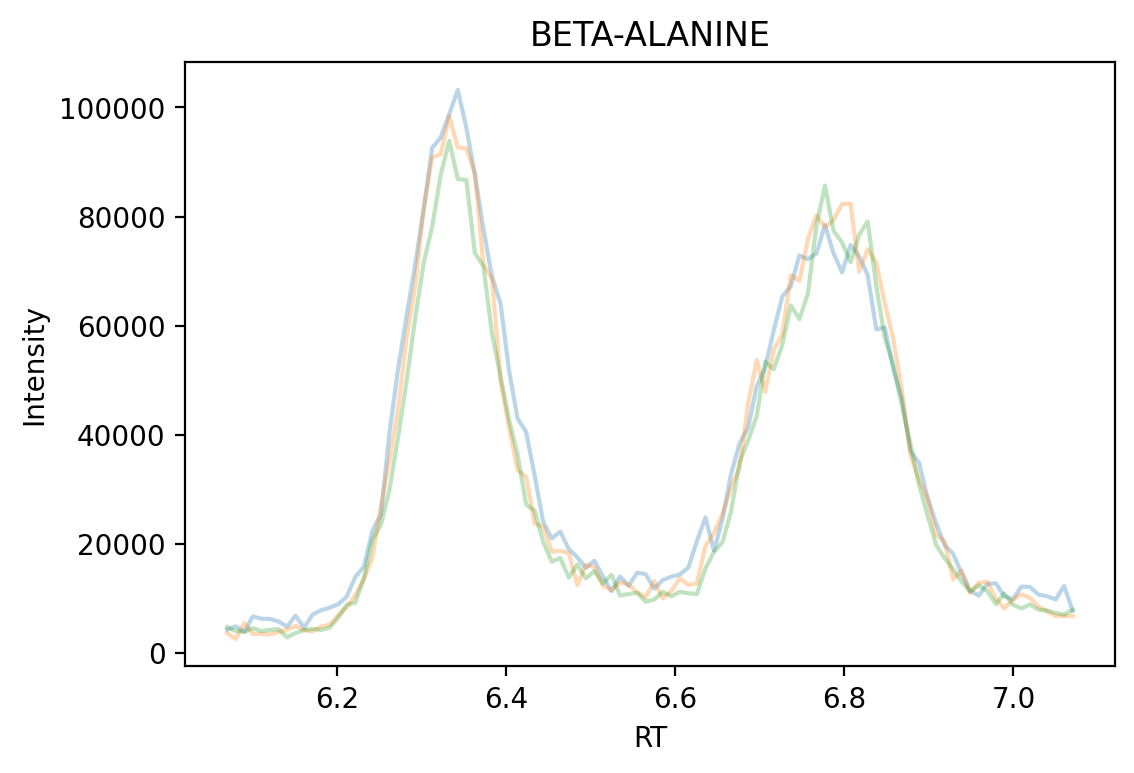

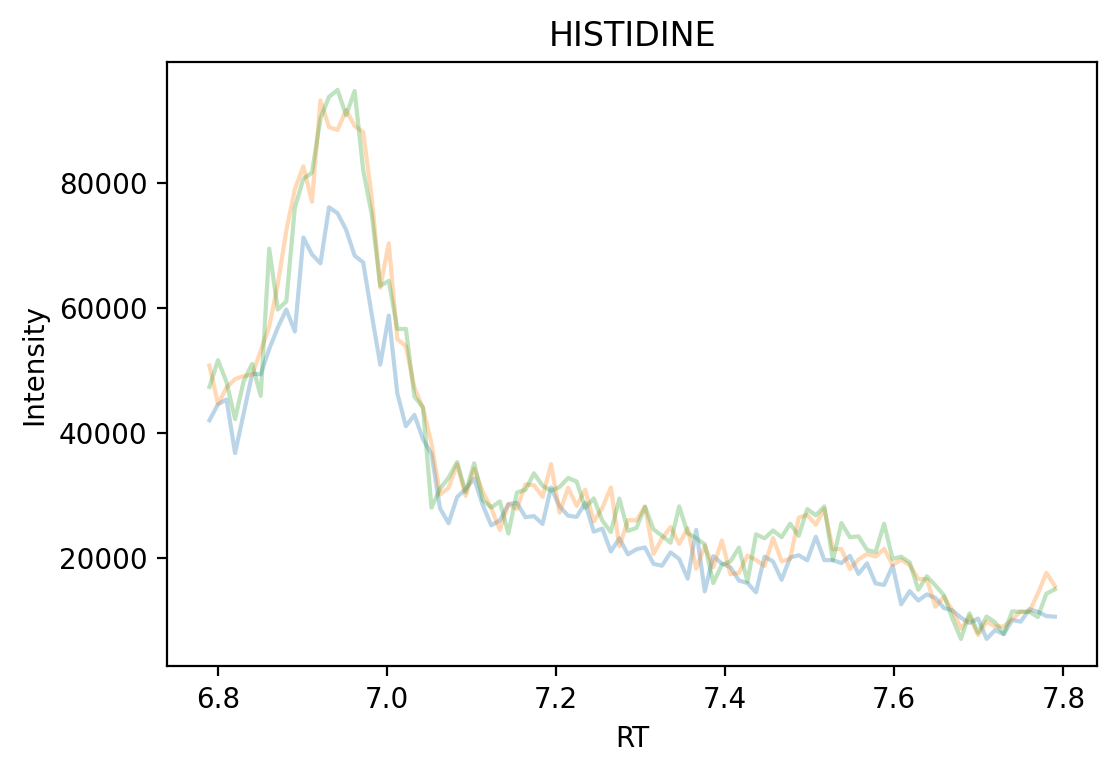

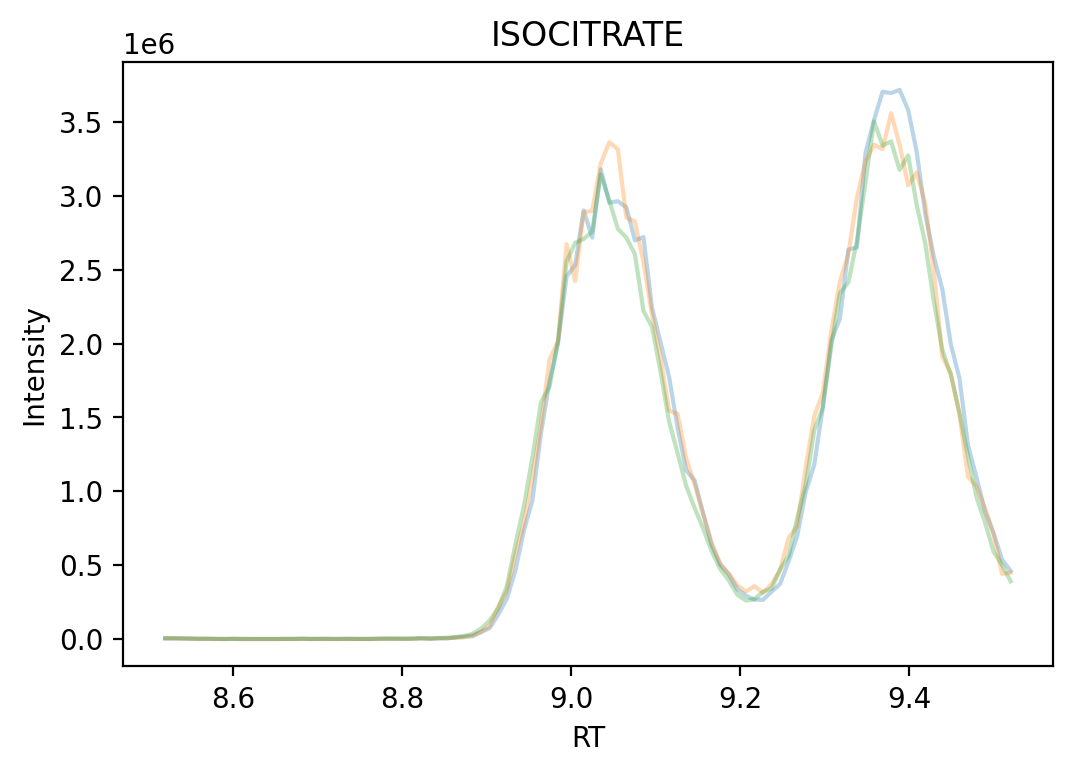

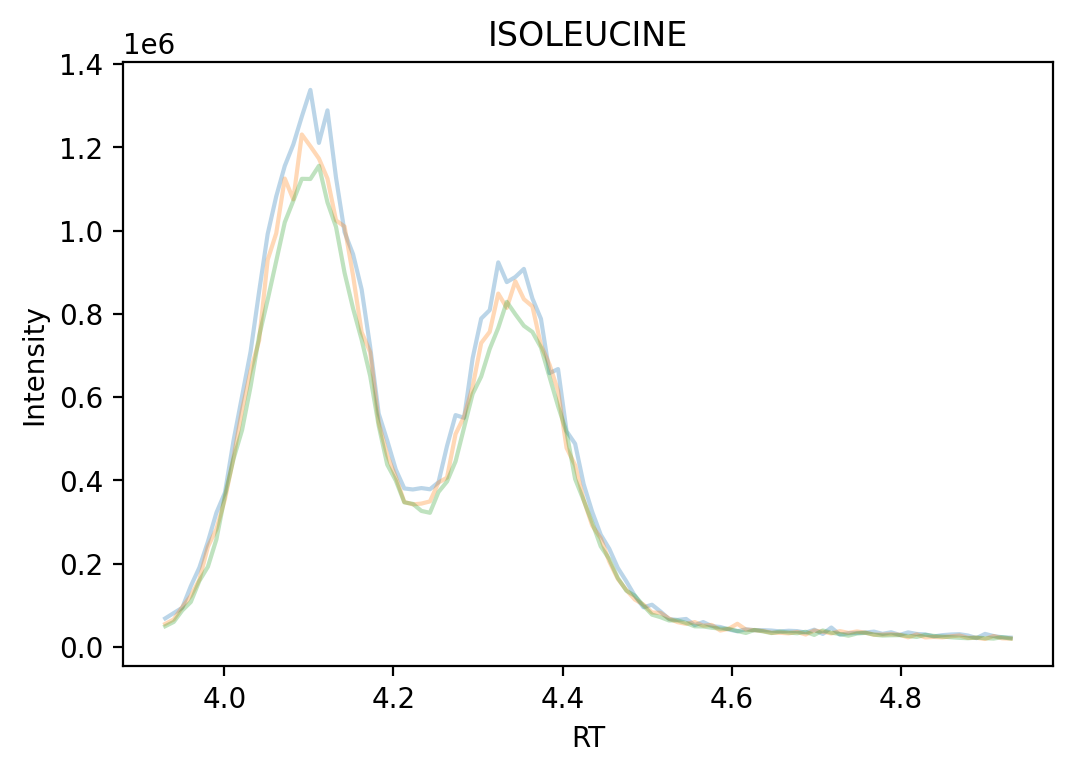

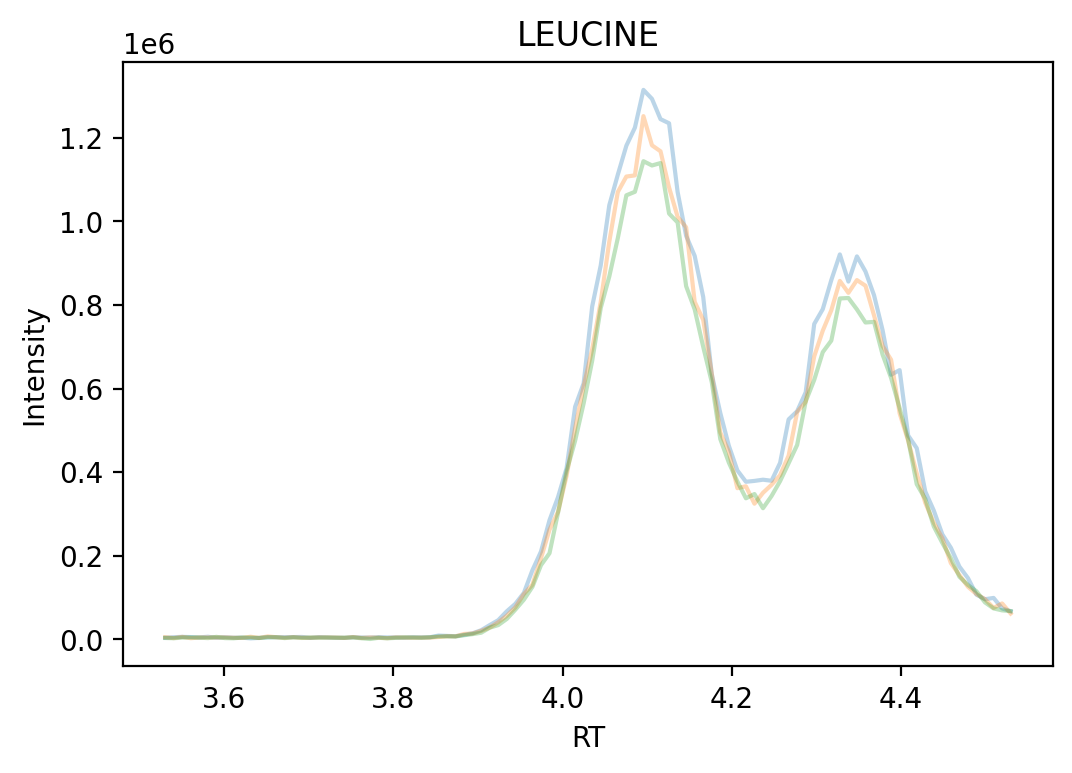

In [56]:
for mz,rt,name in real_peaks:
    if name in misClass["metabolite"].values:
        plt.figure()
        integ.plot_overlayedEIC([raw_data[file] for file in files],mz,rt-.5,rt + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        plt.title(name)

In [57]:
corClass = df[df["classification"] == "true peak"]
corClass

metabolite classification  \
0                  Fructose 1,6-bisphosphate      true peak   
2                            Acetoacetyl-CoA      true peak   
3                                 Acetyl-CoA      true peak   
4                            Chelidamic Acid      true peak   
5                            CMP-sialic acid      true peak   
..                                       ...            ...   
182                                THREONINE      true peak   
183                                TREHALOSE      true peak   
184                                  URIDINE      true peak   
185  URIDINE DIPHOSPHATE-N-ACETYLGLUCOSAMINE      true peak   
186                             OXOGLUTARATE      true peak   

                       sample  
0    M3T-Std_neg_DDA_1mz.mzML  
2    M3T-Std_neg_DDA_1mz.mzML  
3    M3T-Std_neg_DDA_1mz.mzML  
4    M3T-Std_neg_DDA_1mz.mzML  
5    M3T-Std_neg_DDA_1mz.mzML  
..                        ...  
182  M3T-Std_neg_DDA_5mz.mzML  
183  M3T-Std_neg_DDA_5mz.mzML  
184  M3T-Std_neg_DDA_5mz.mzML  
185  M3T-Std_neg_DDA_5mz.mzML  
186  M3T-Std_neg_DDA_5mz.mzML  

[111 rows x 3 columns]

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



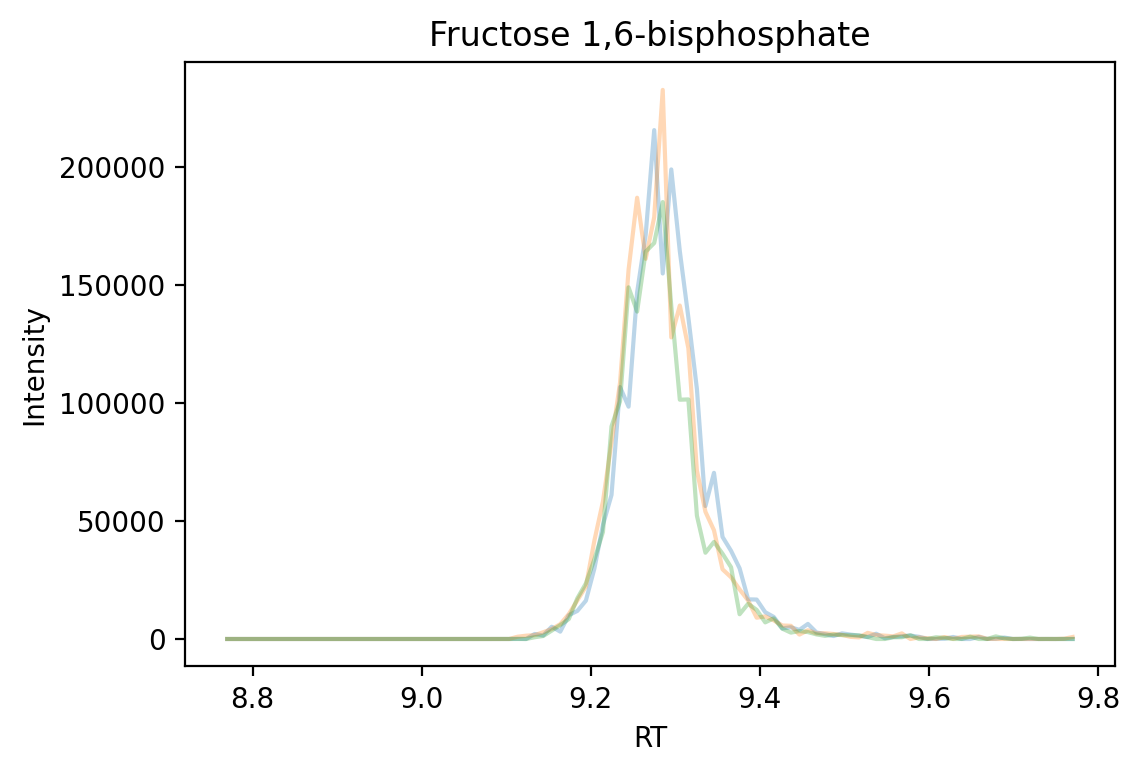

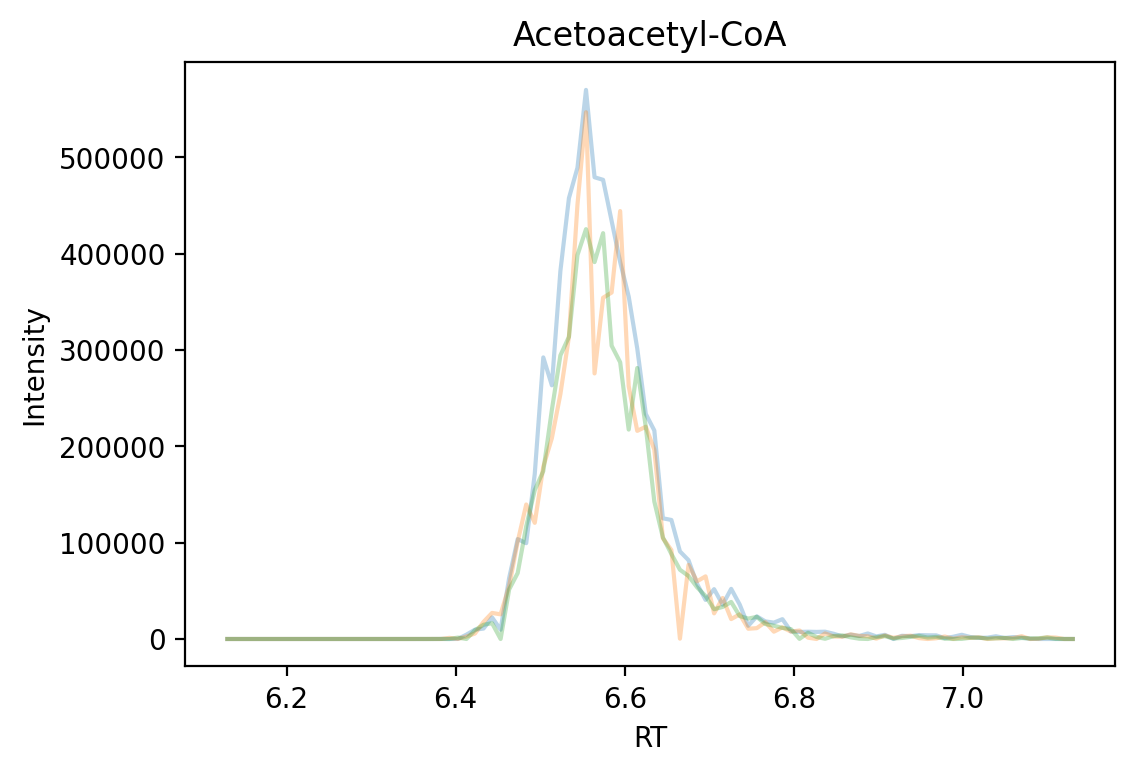

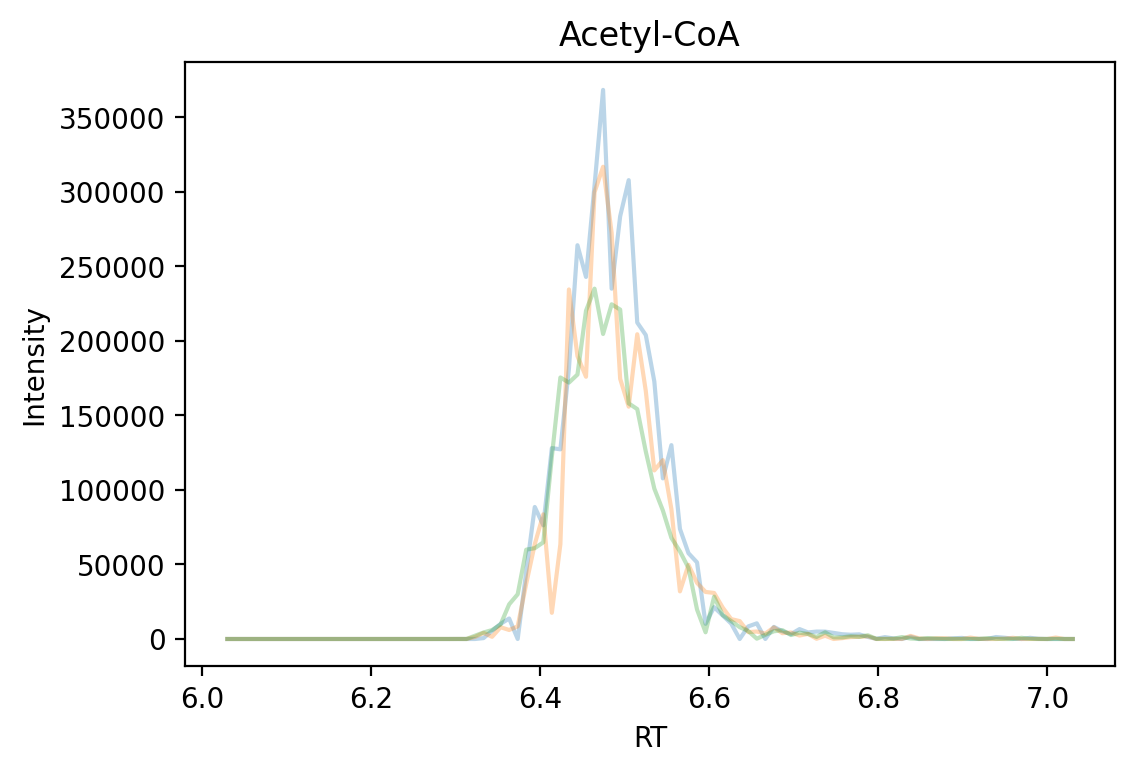

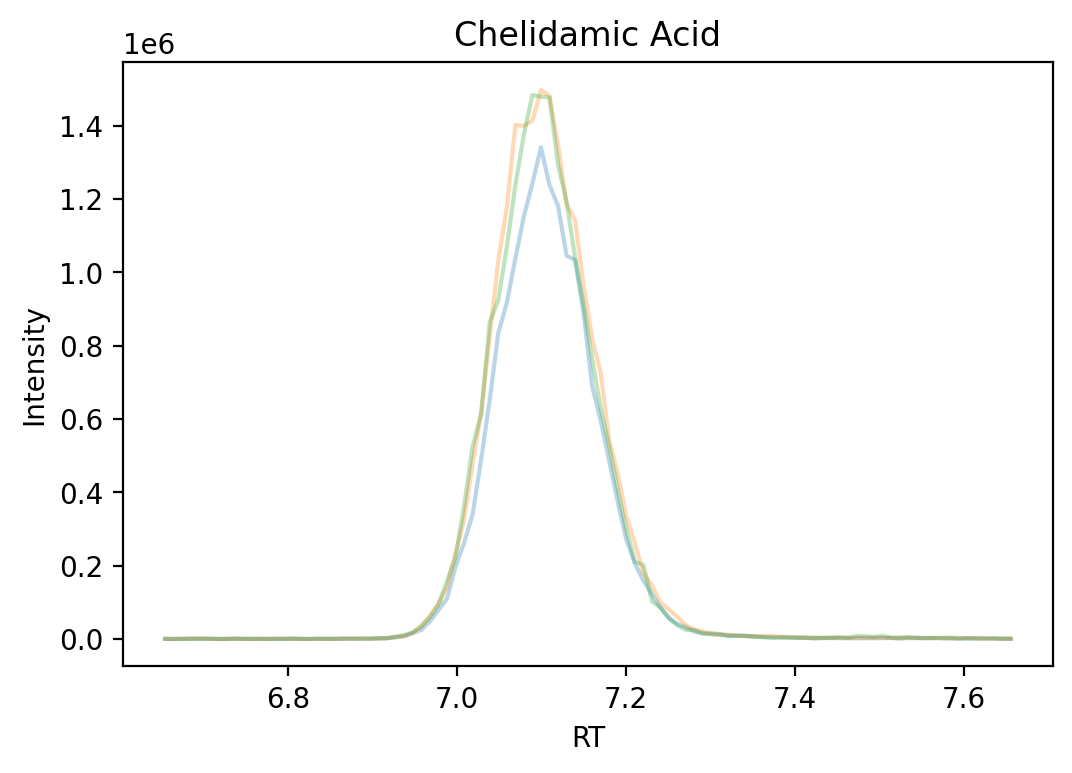

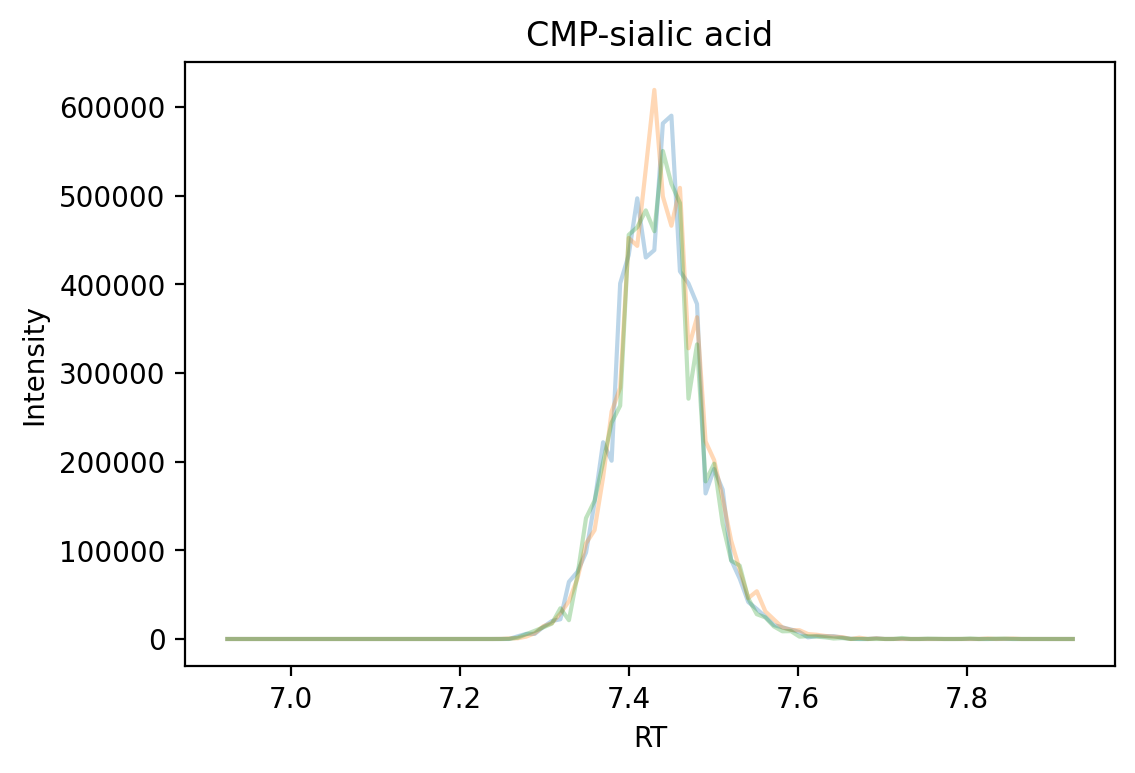

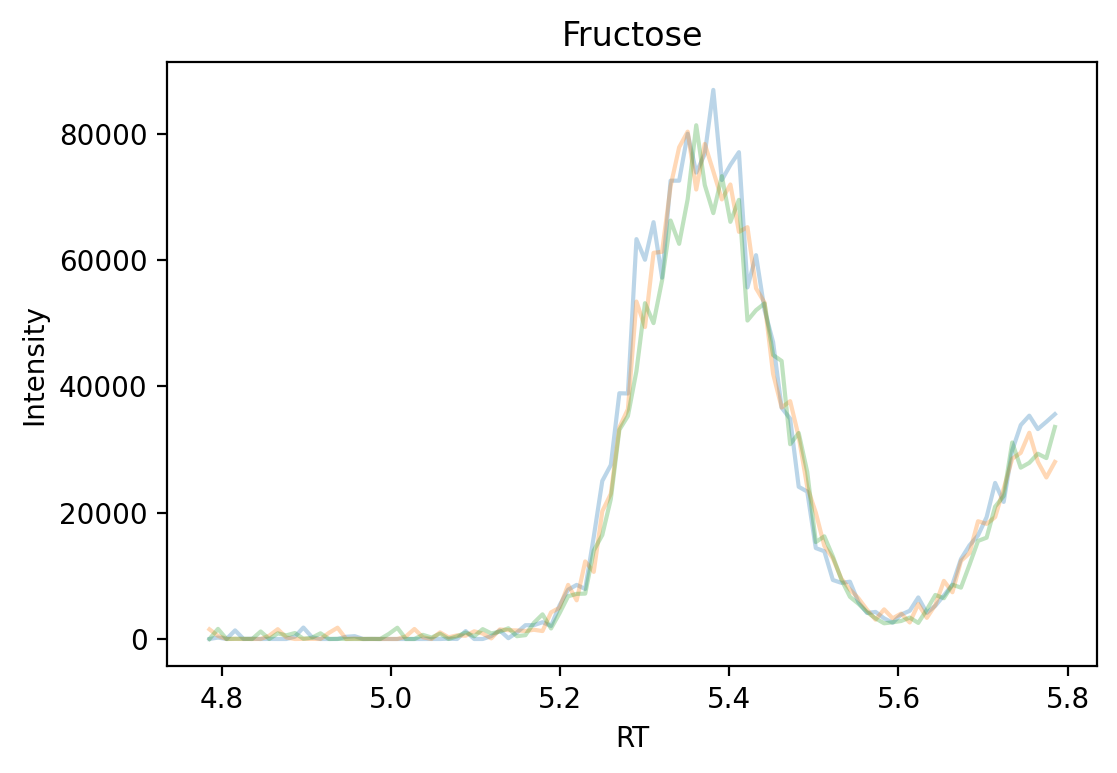

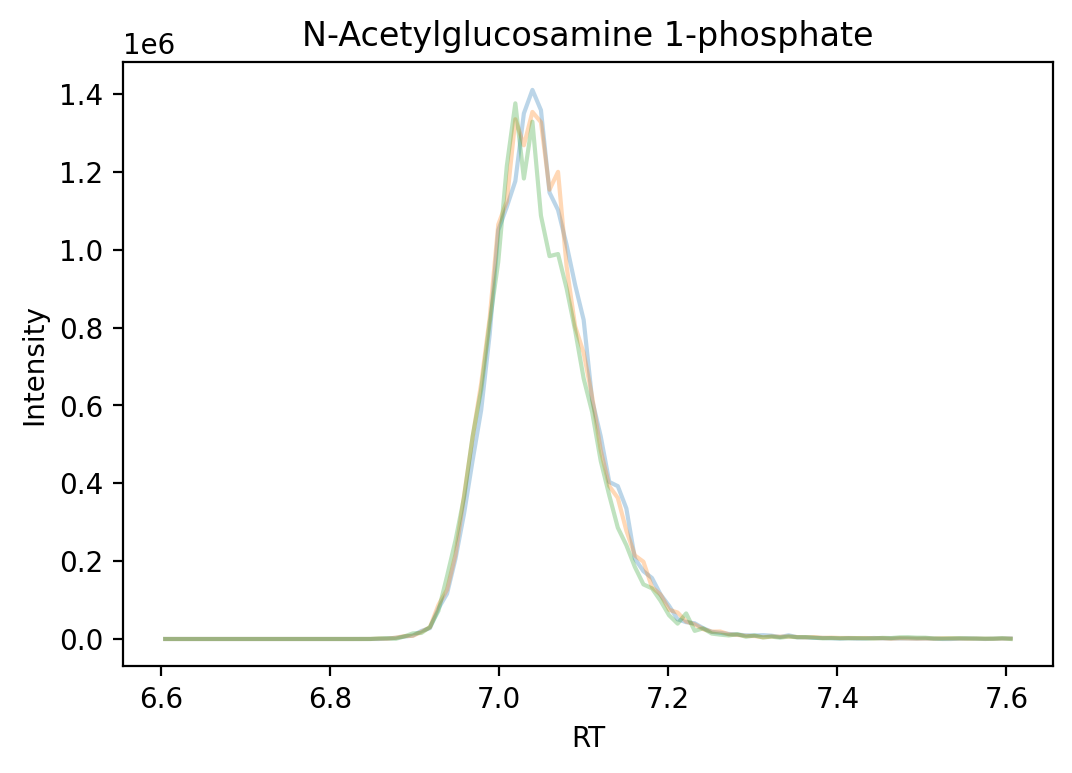

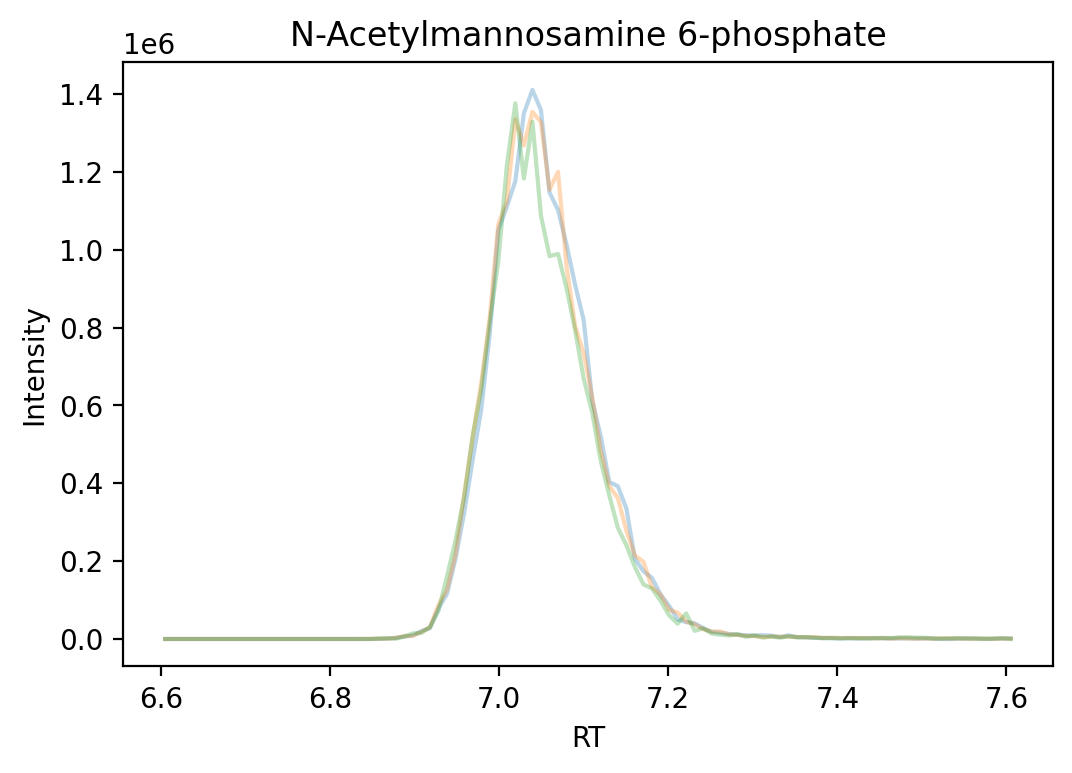

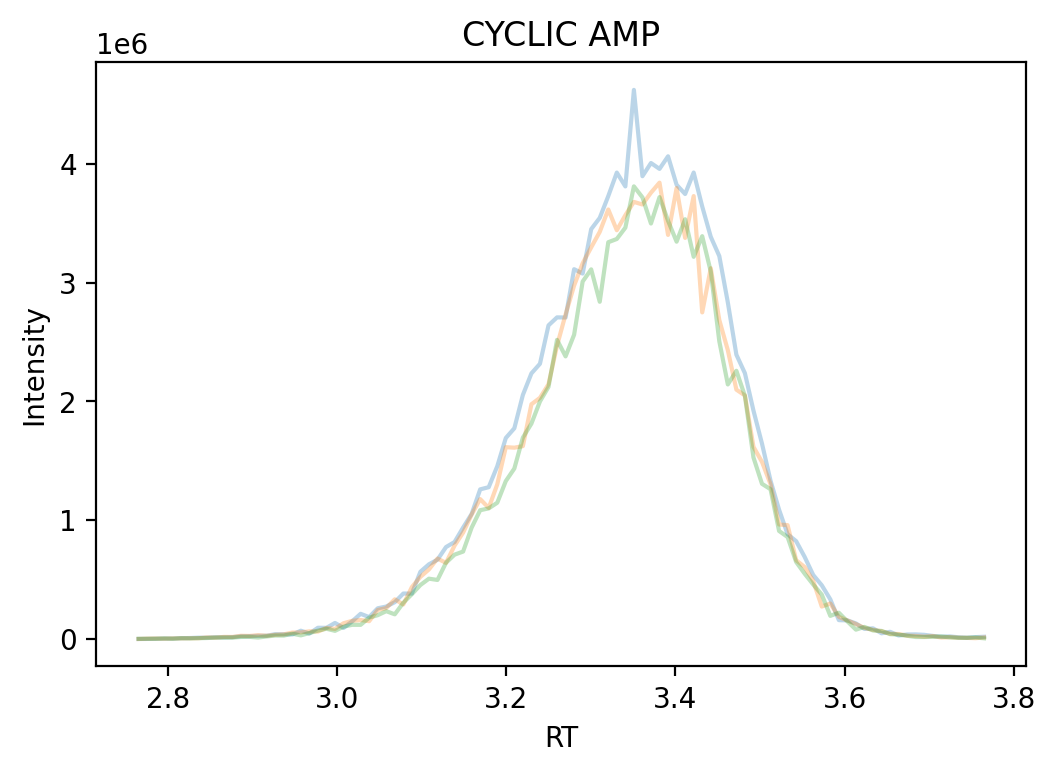

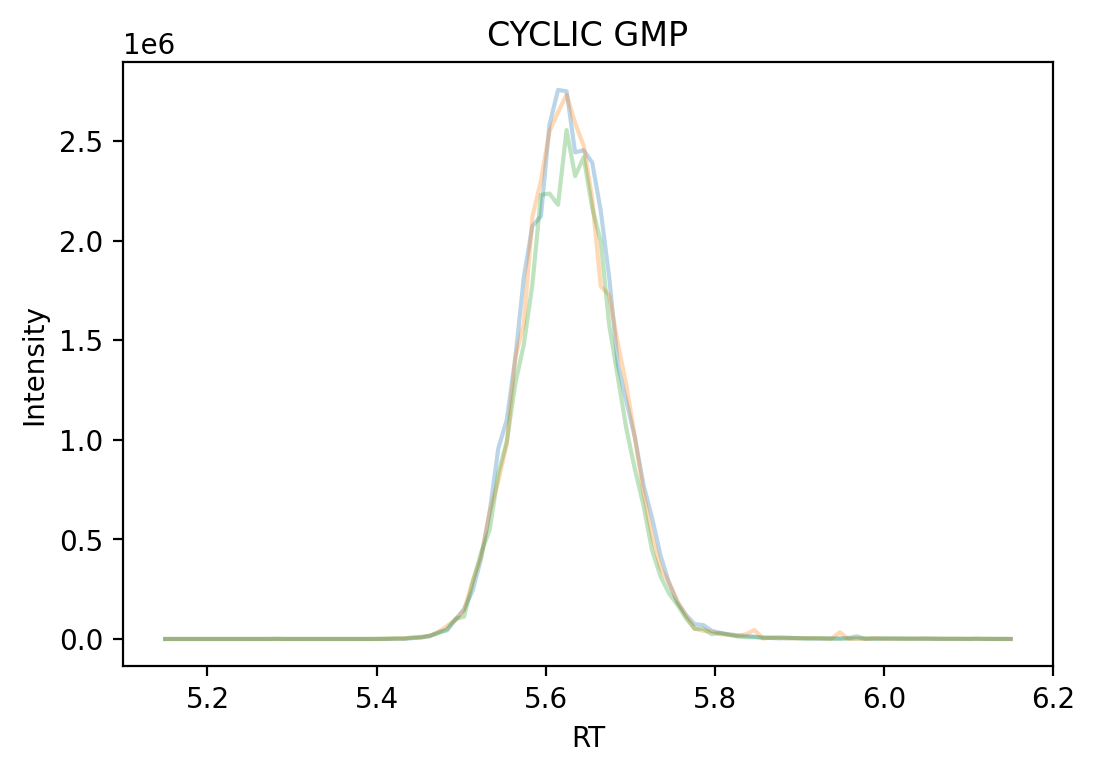

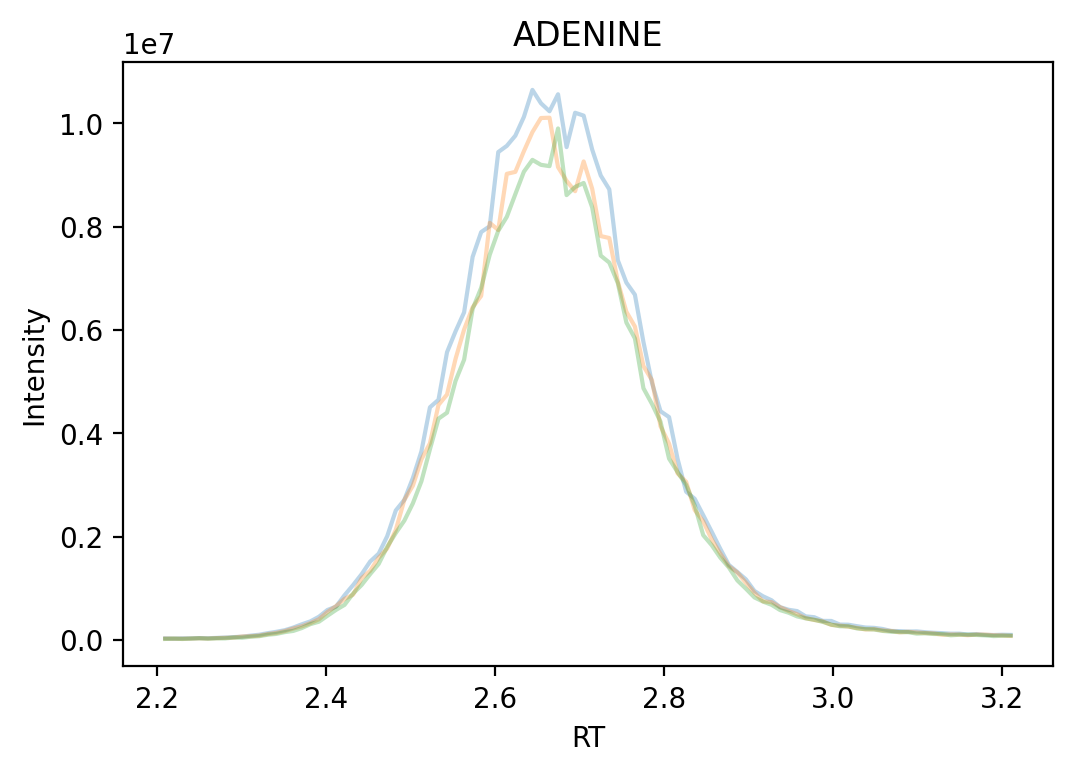

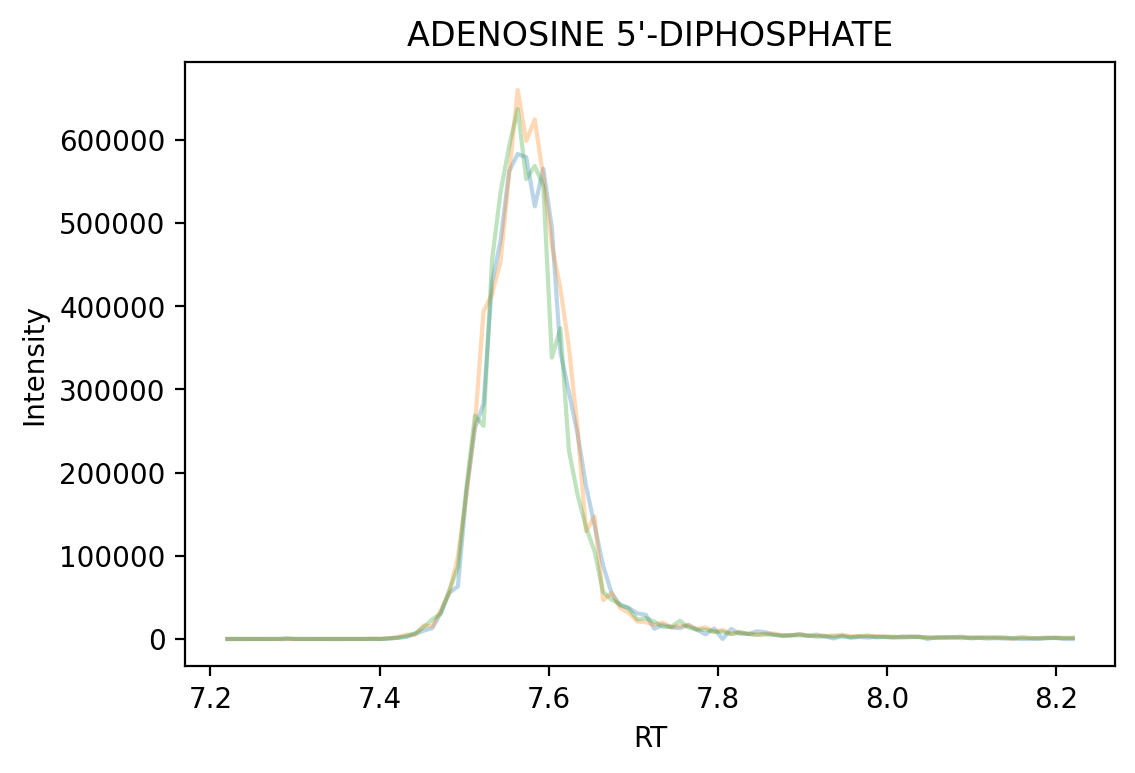

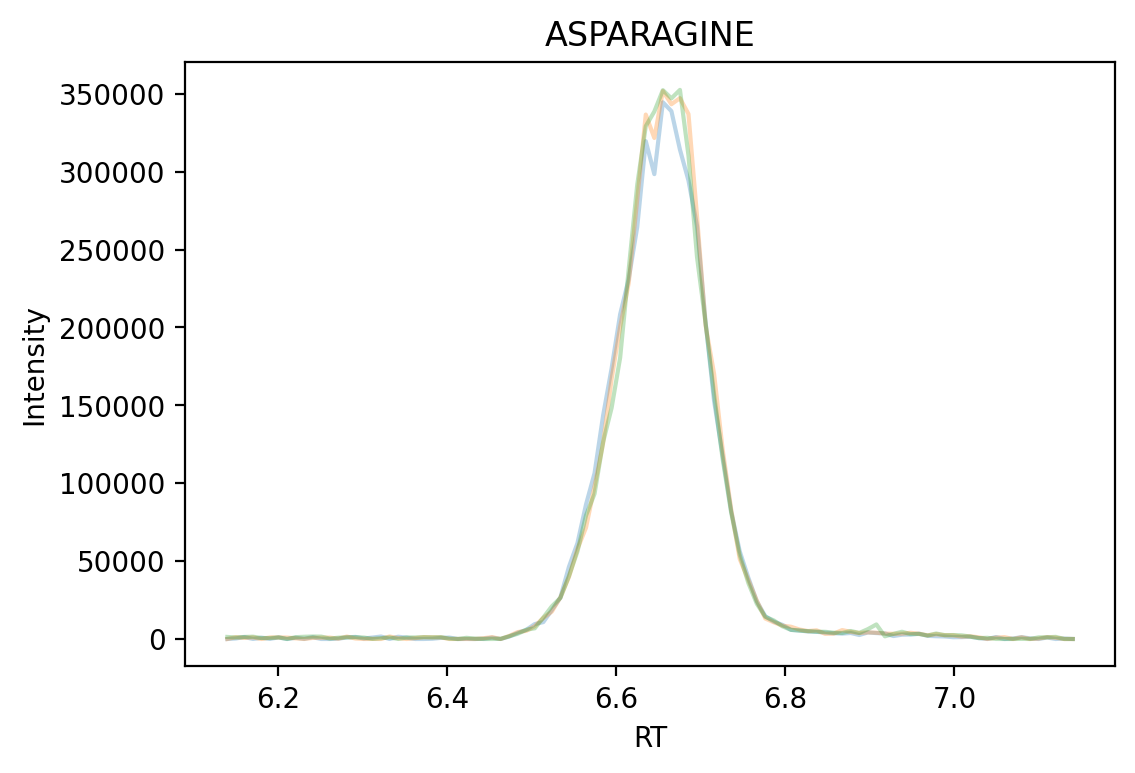

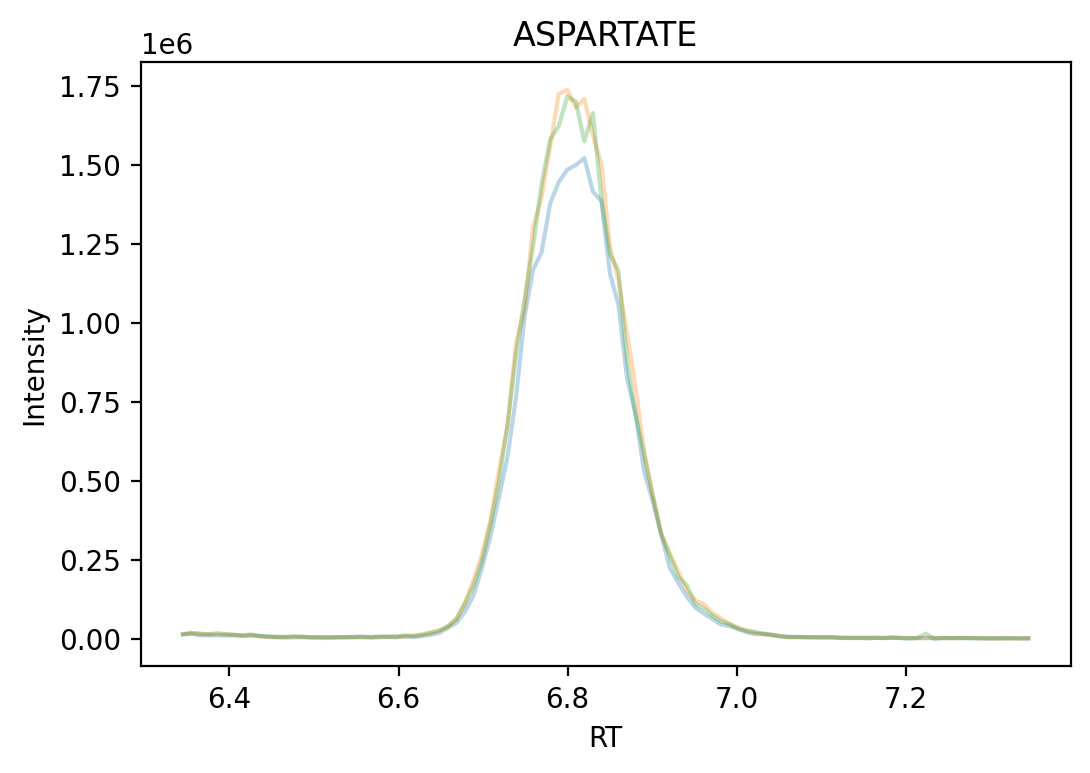

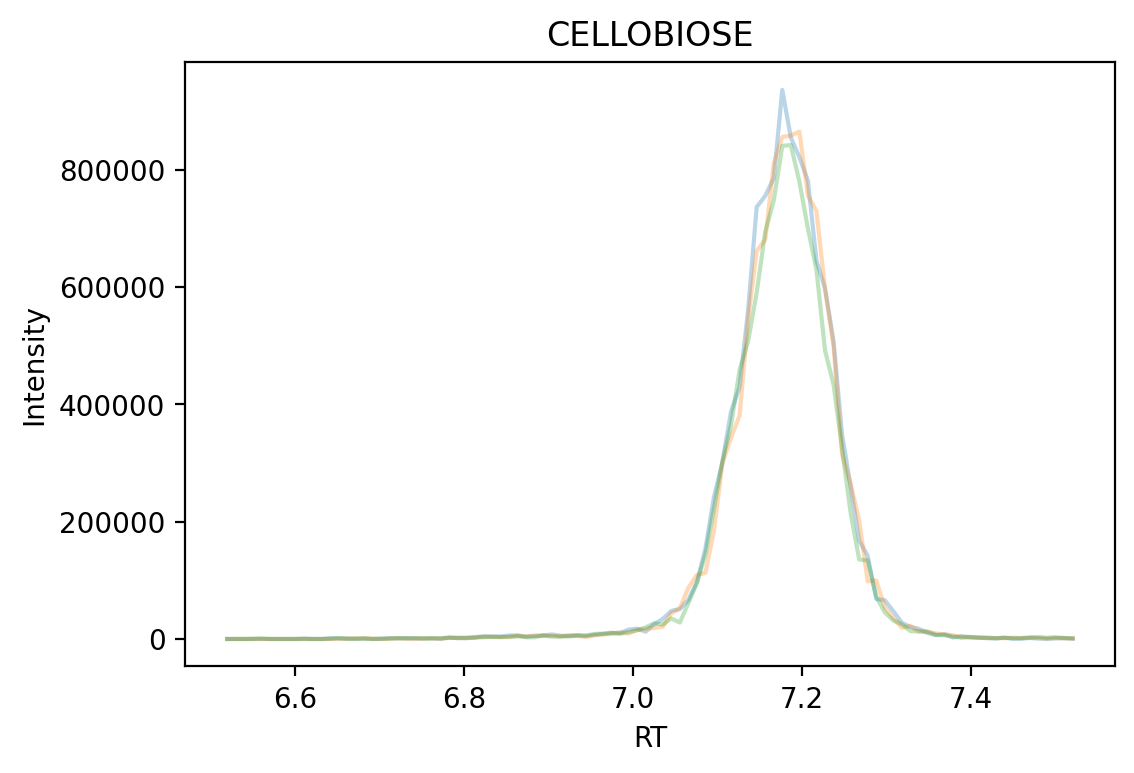

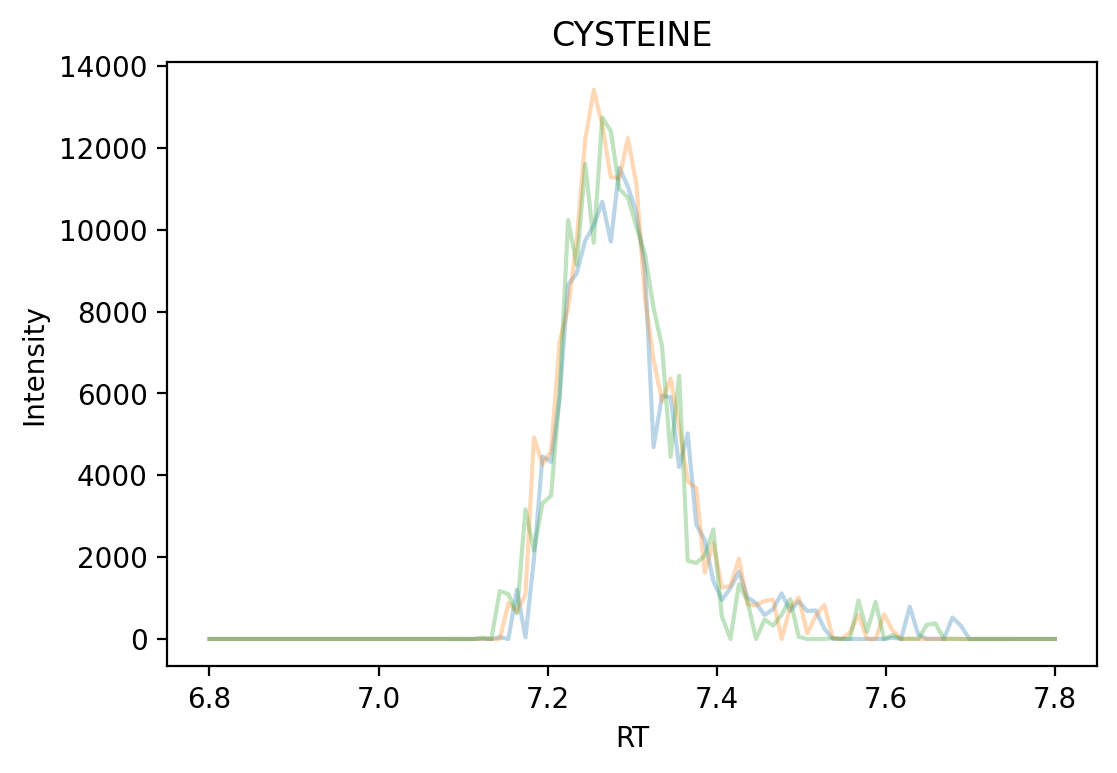

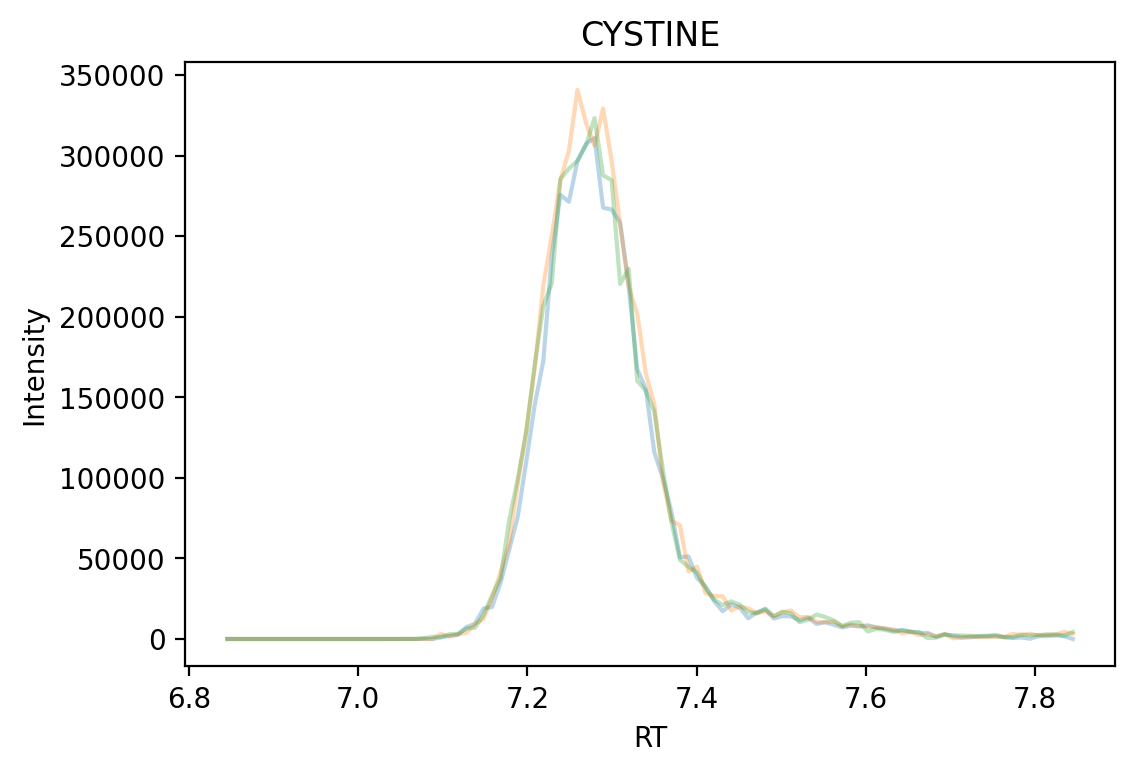

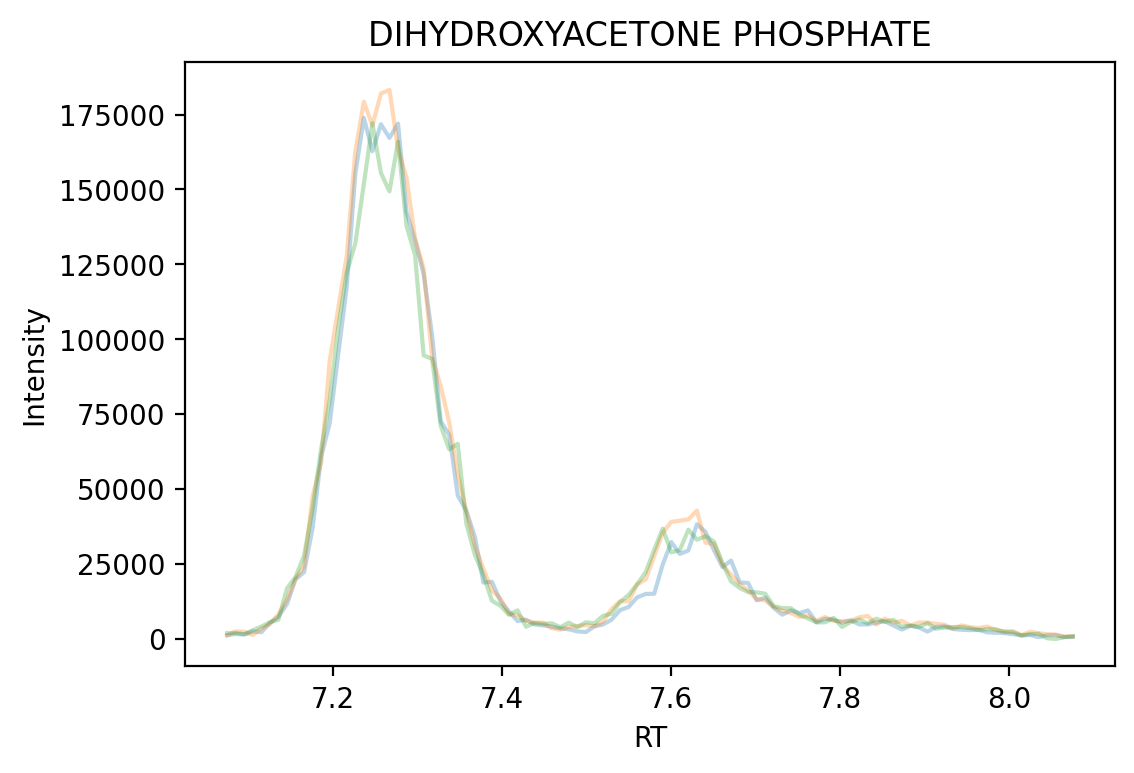

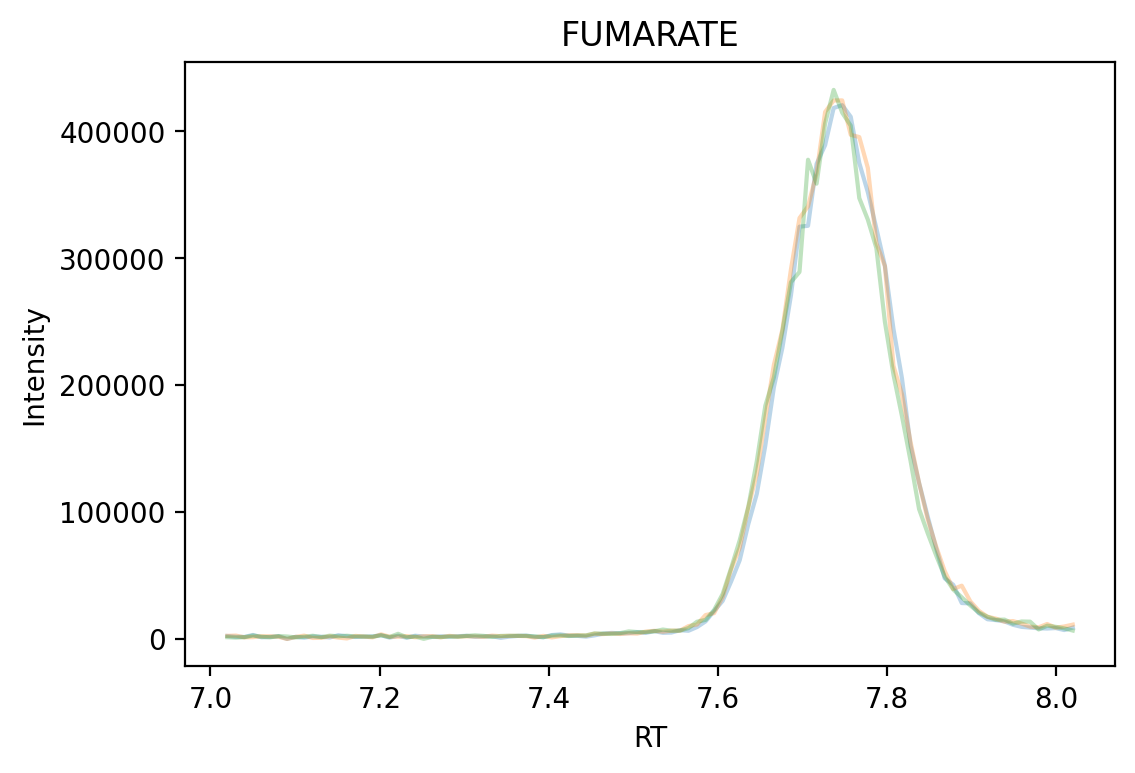

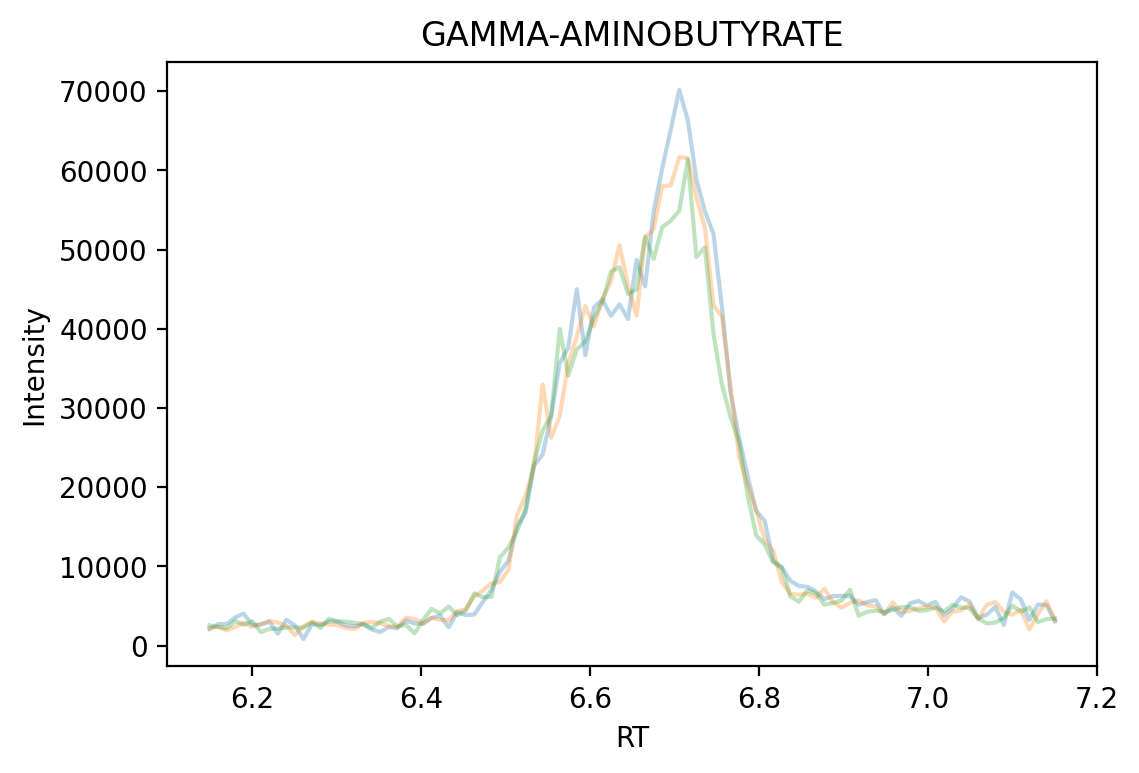

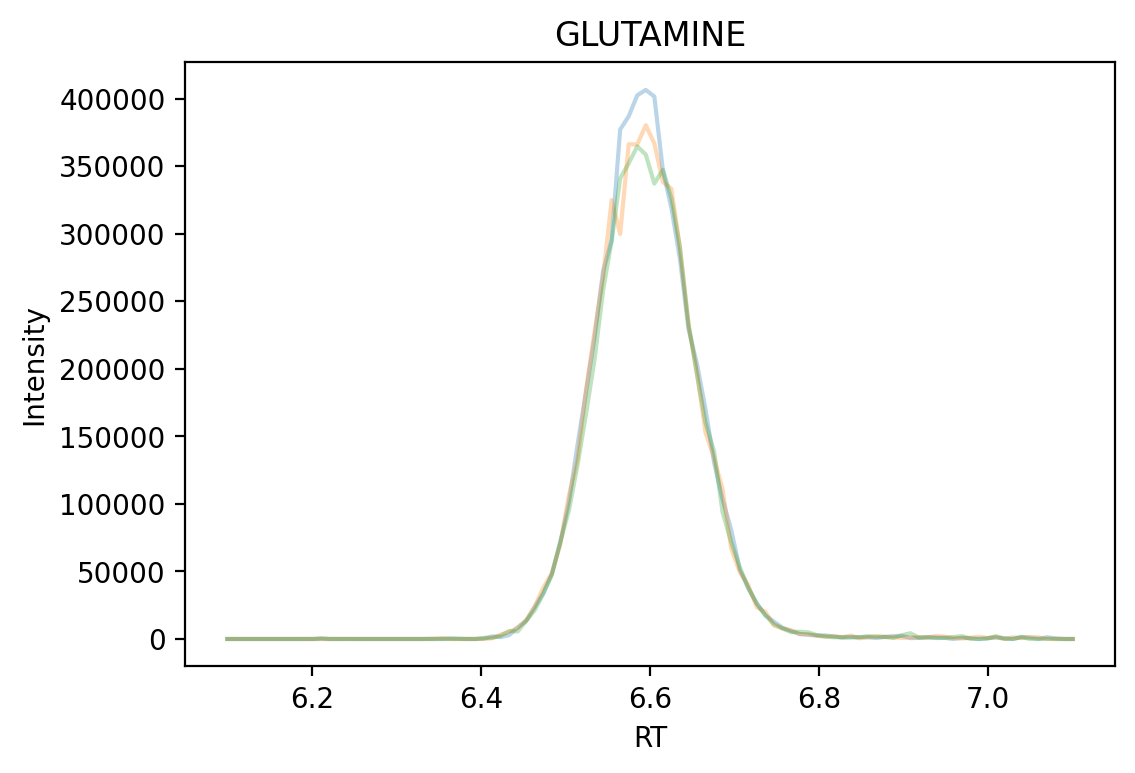

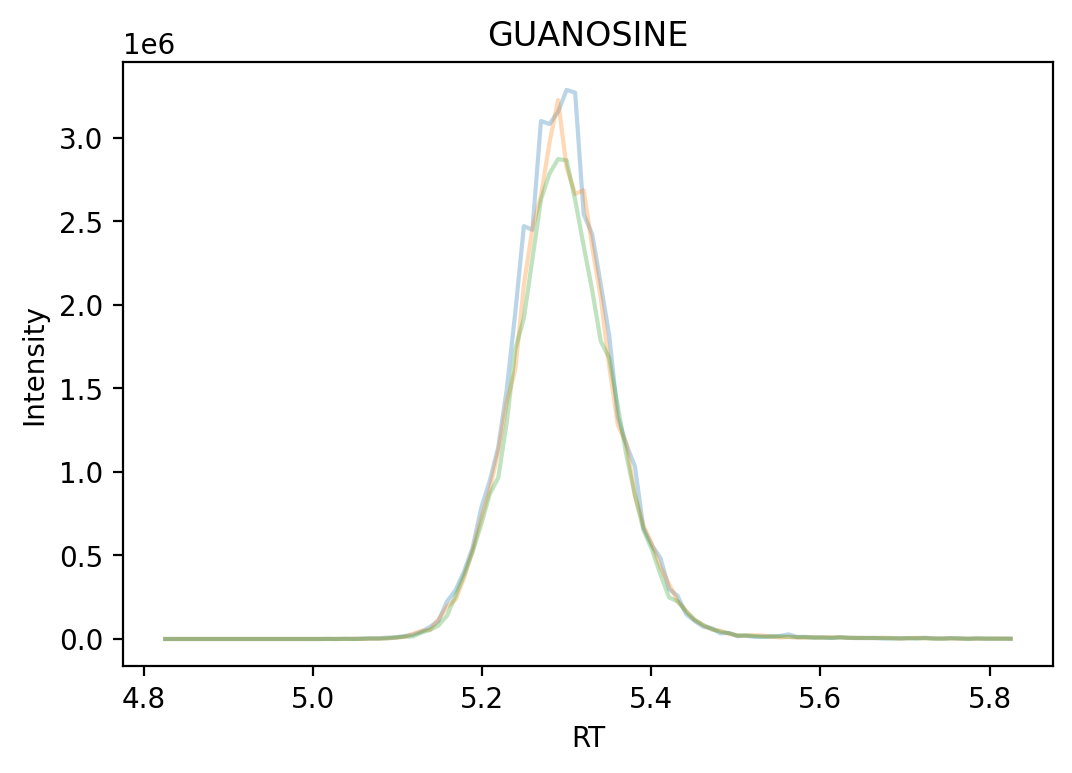

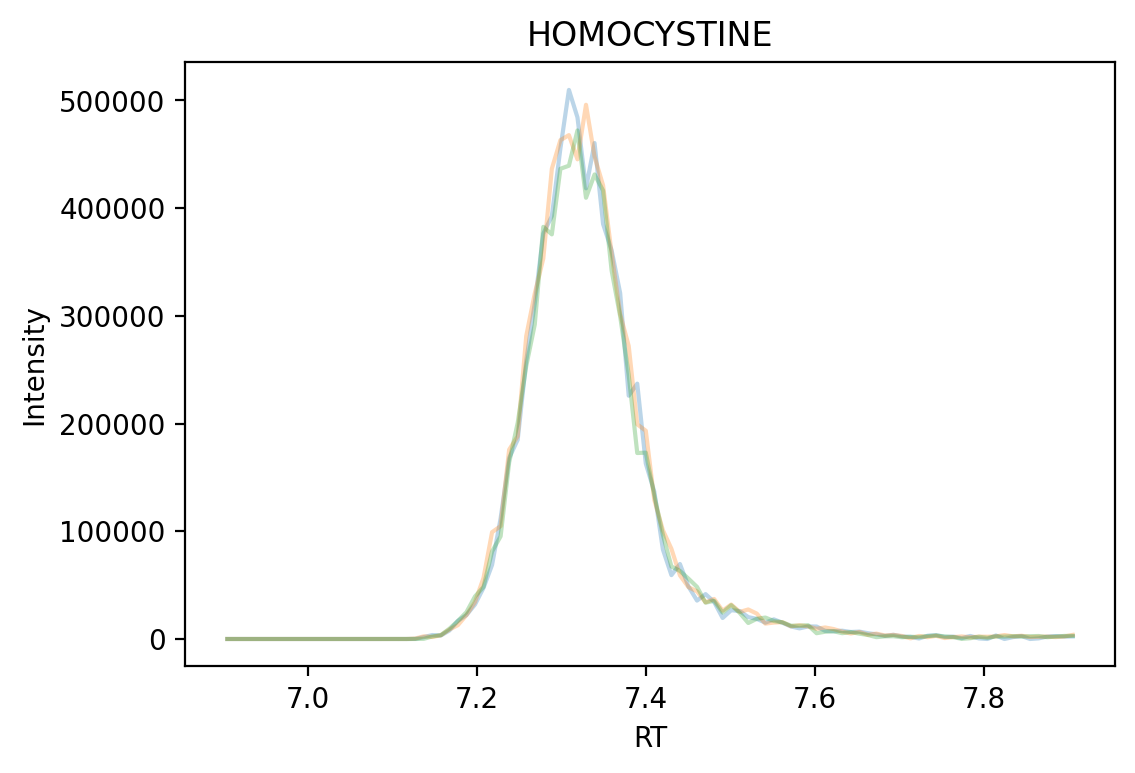

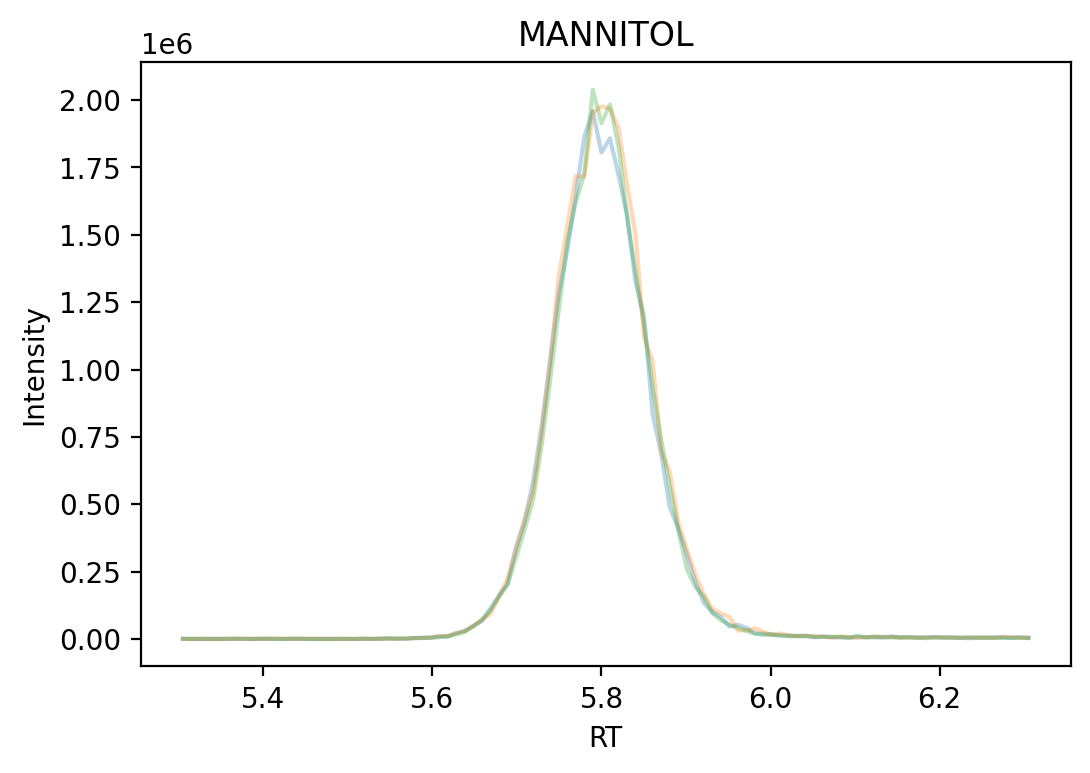

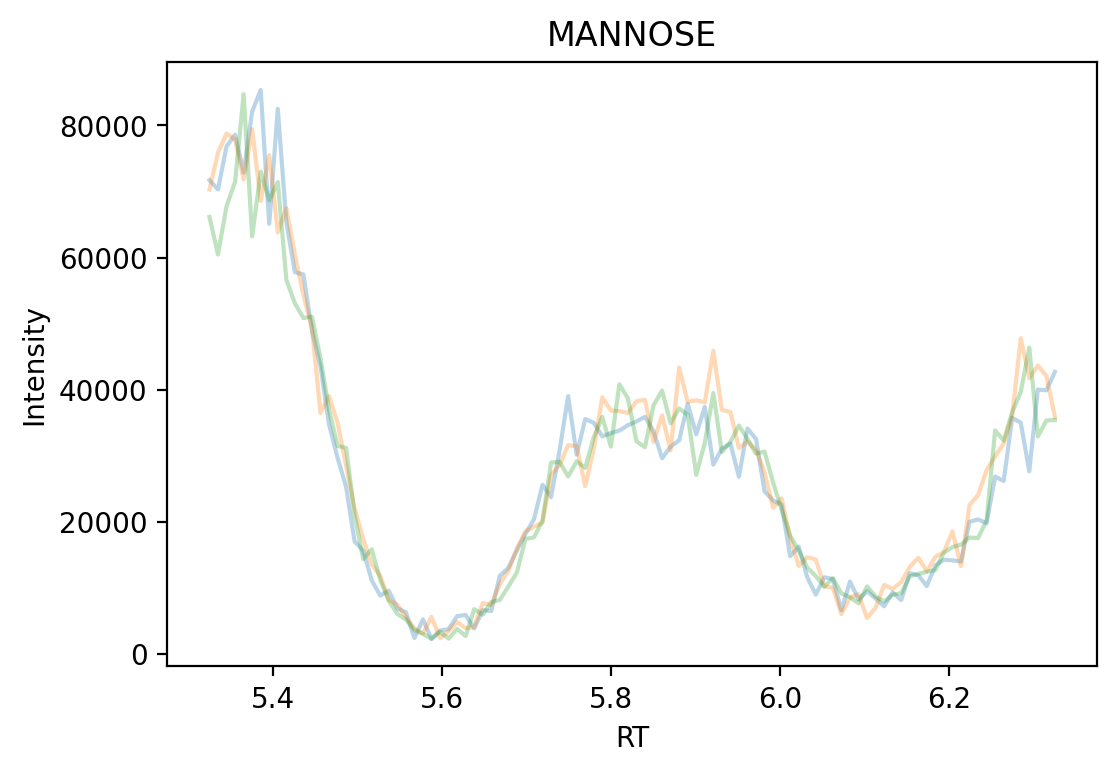

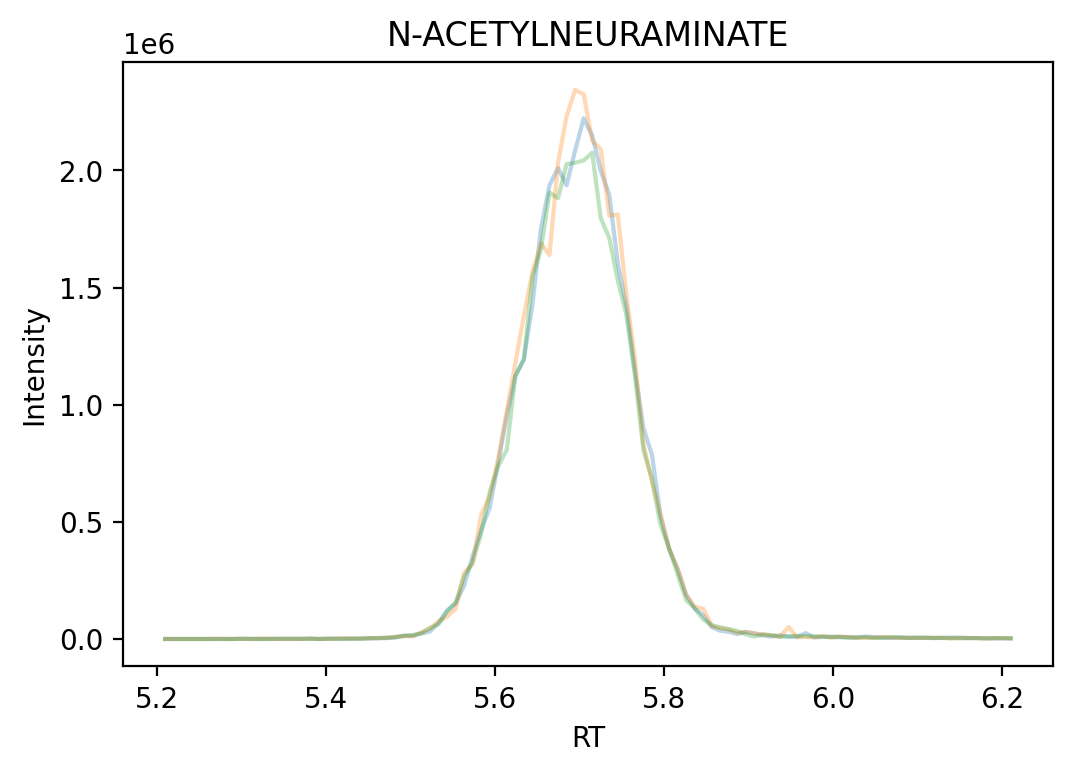

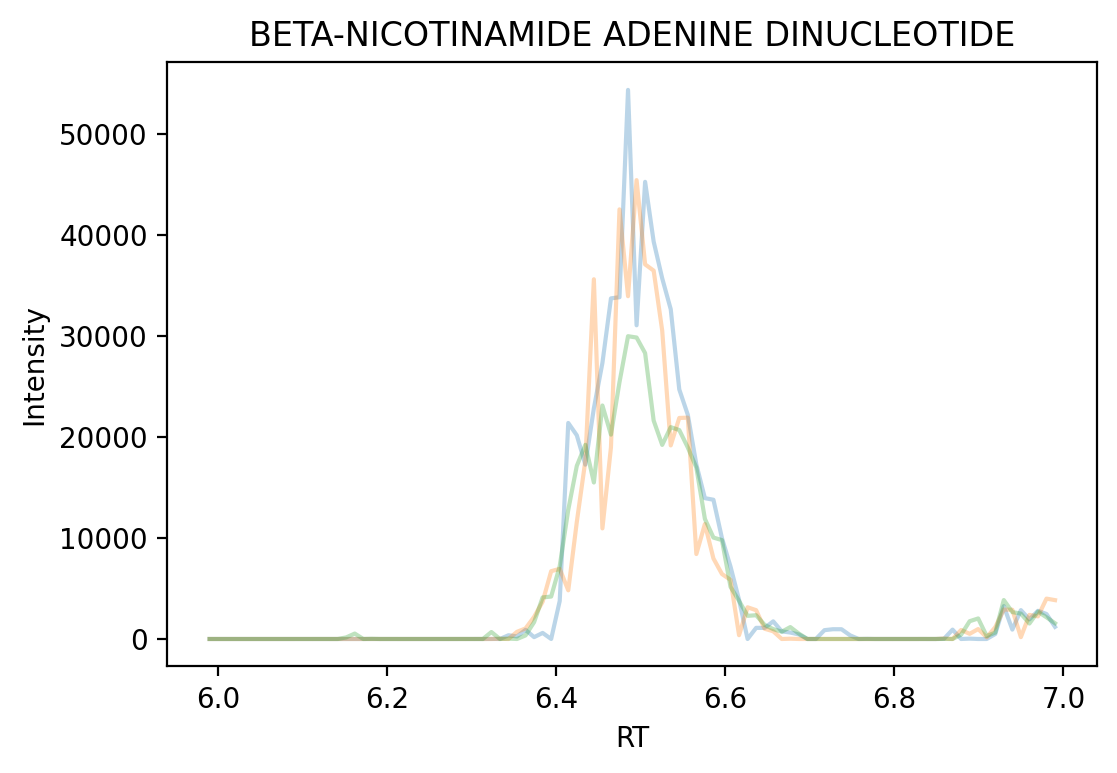

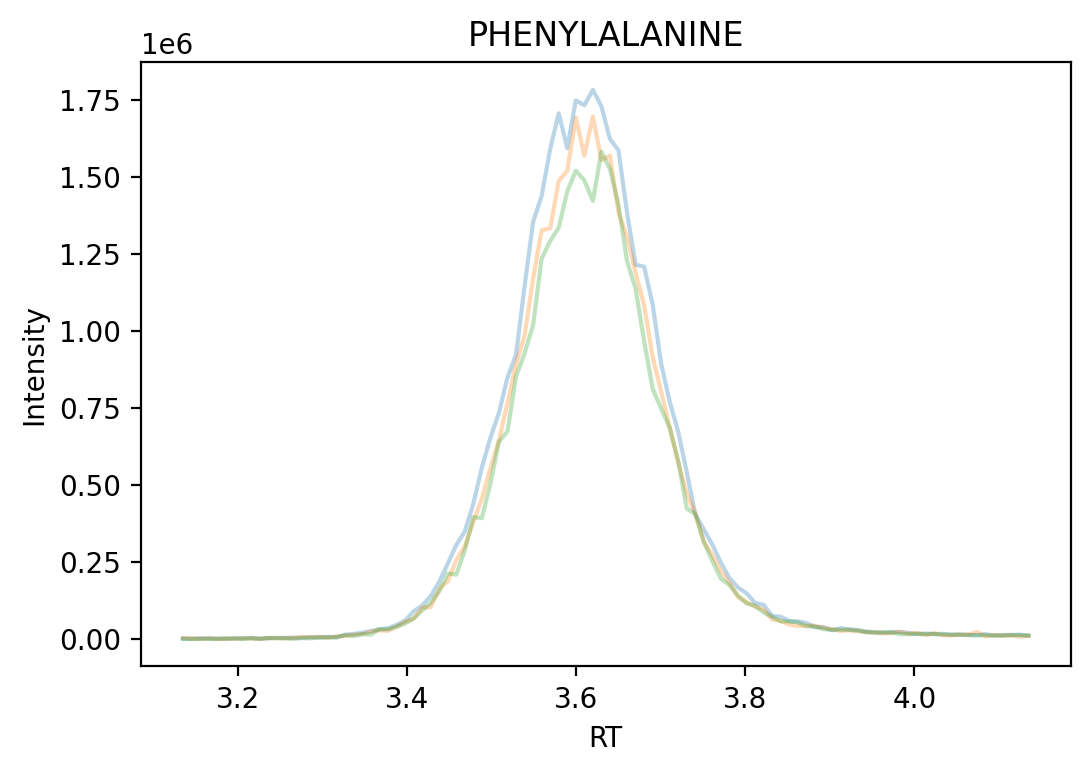

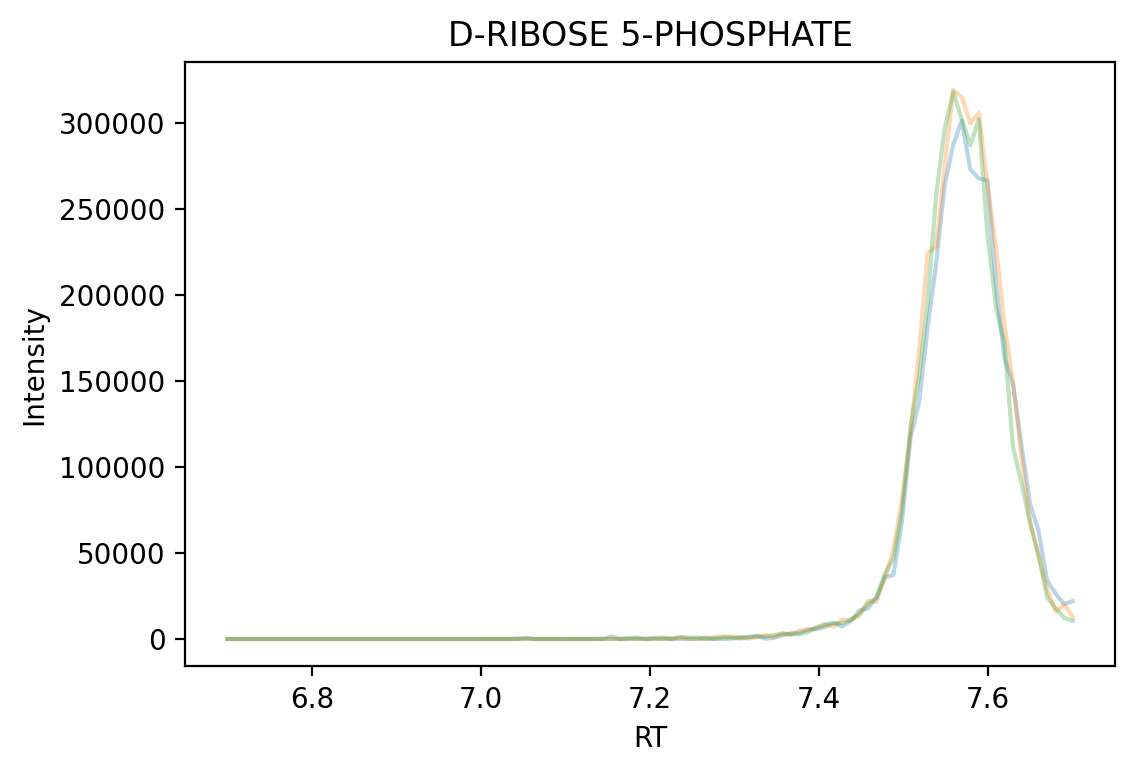

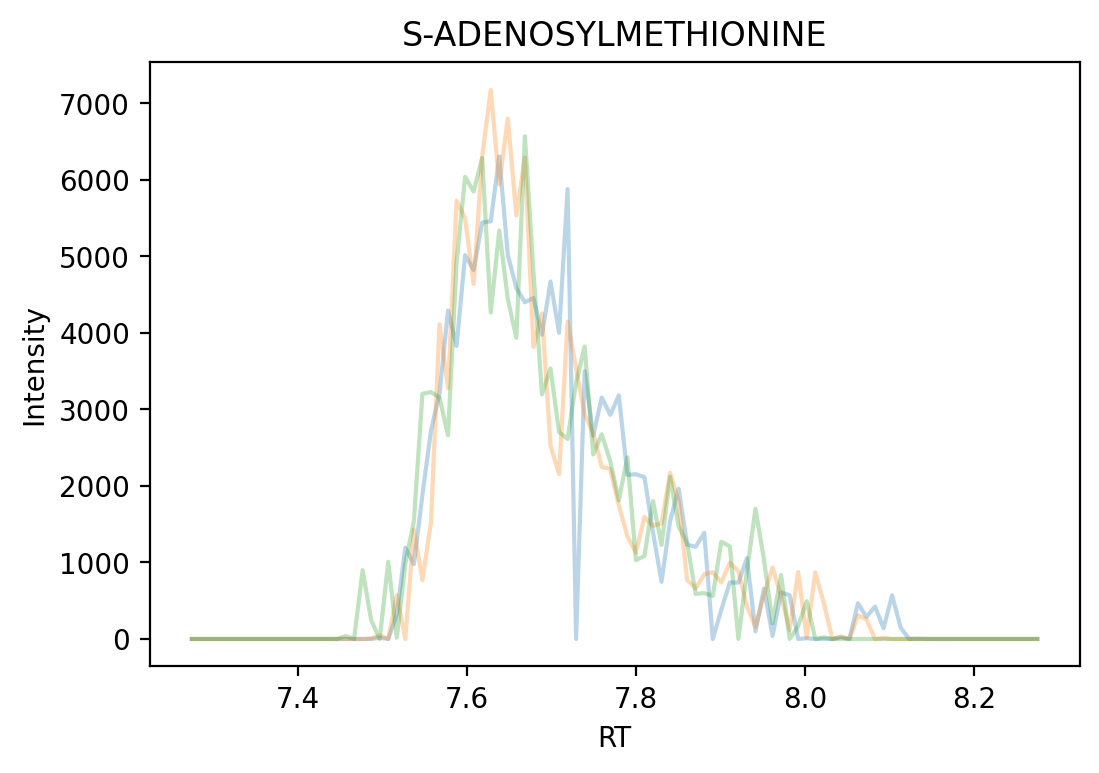

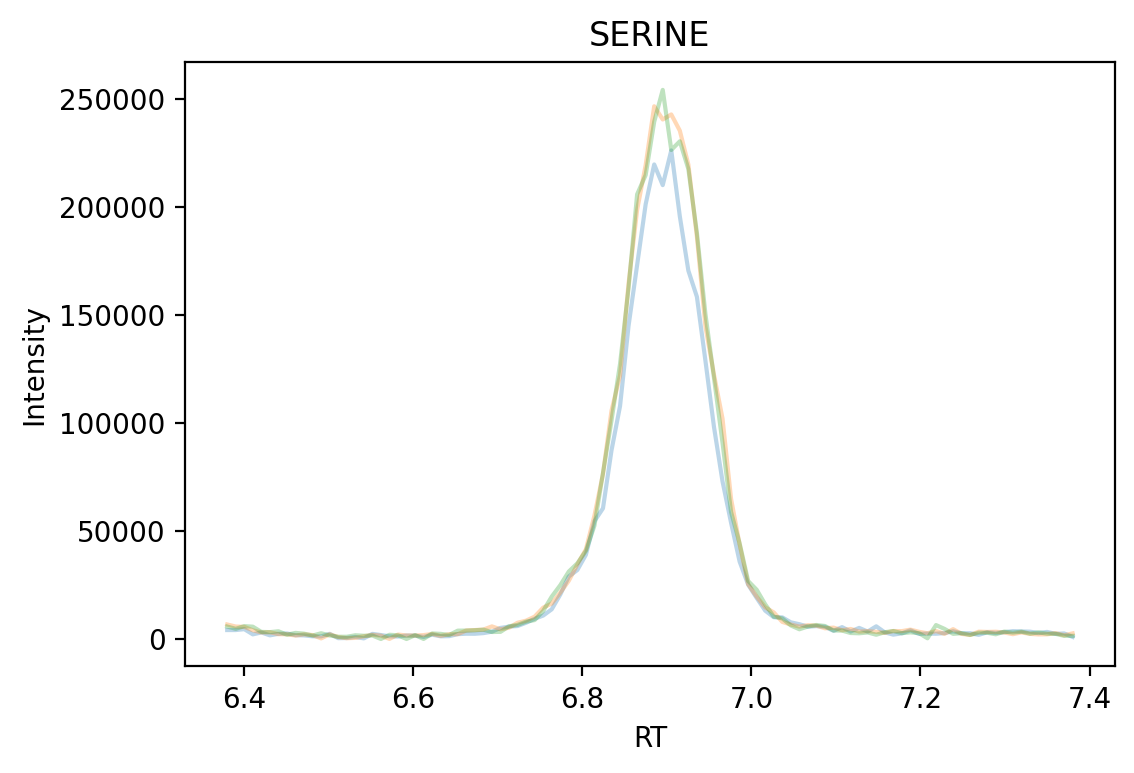

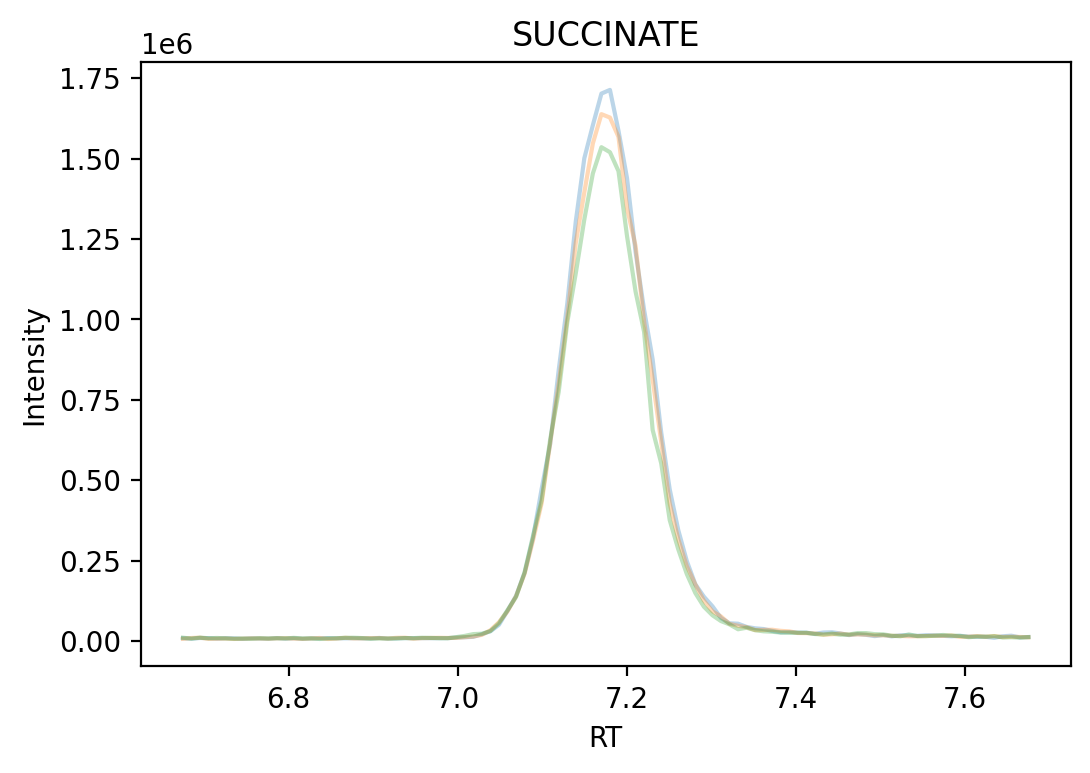

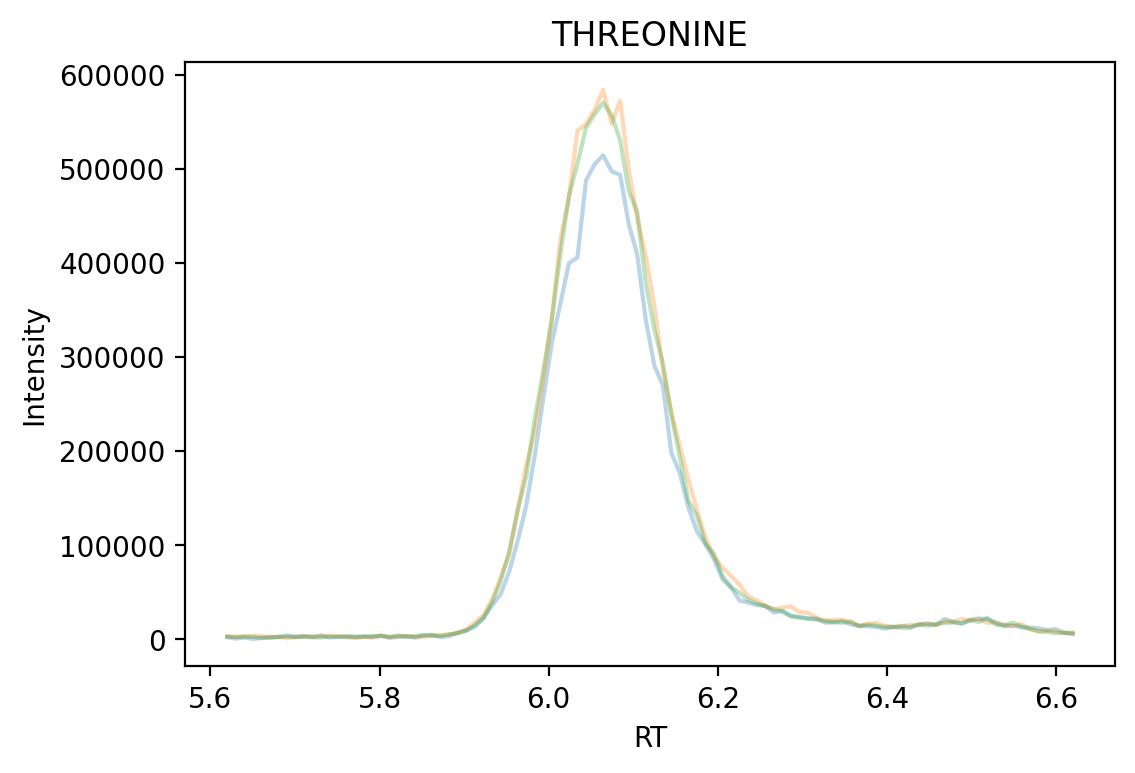

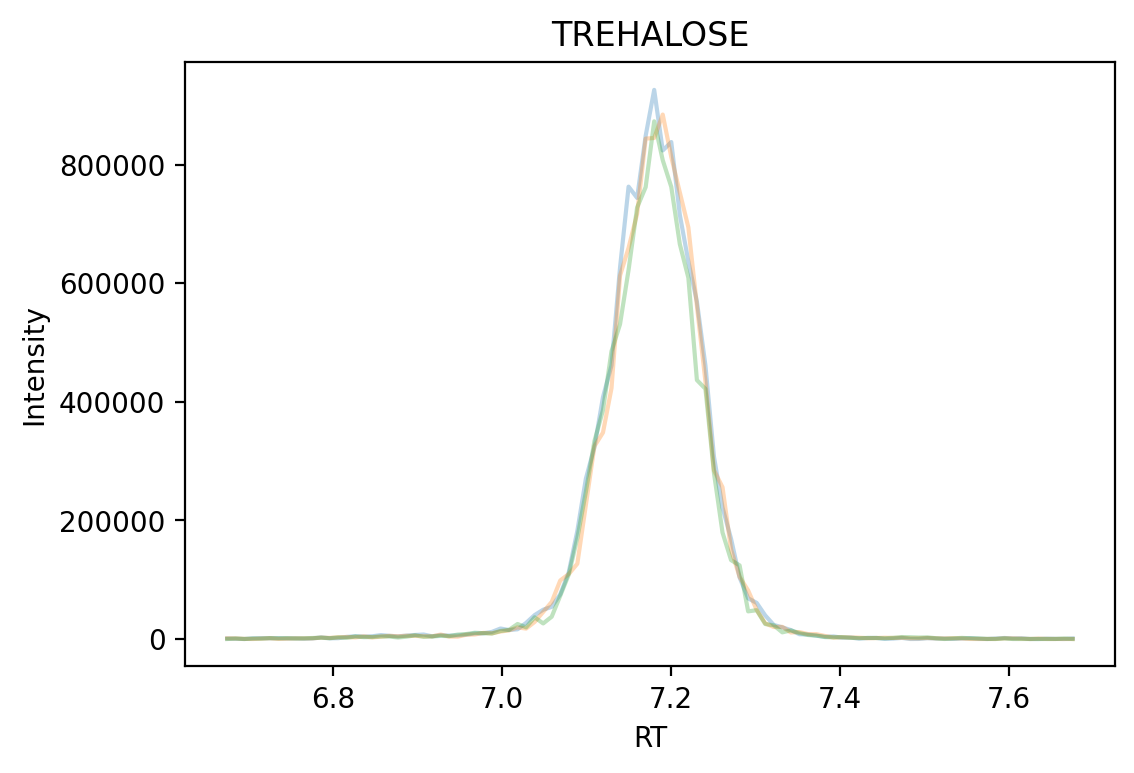

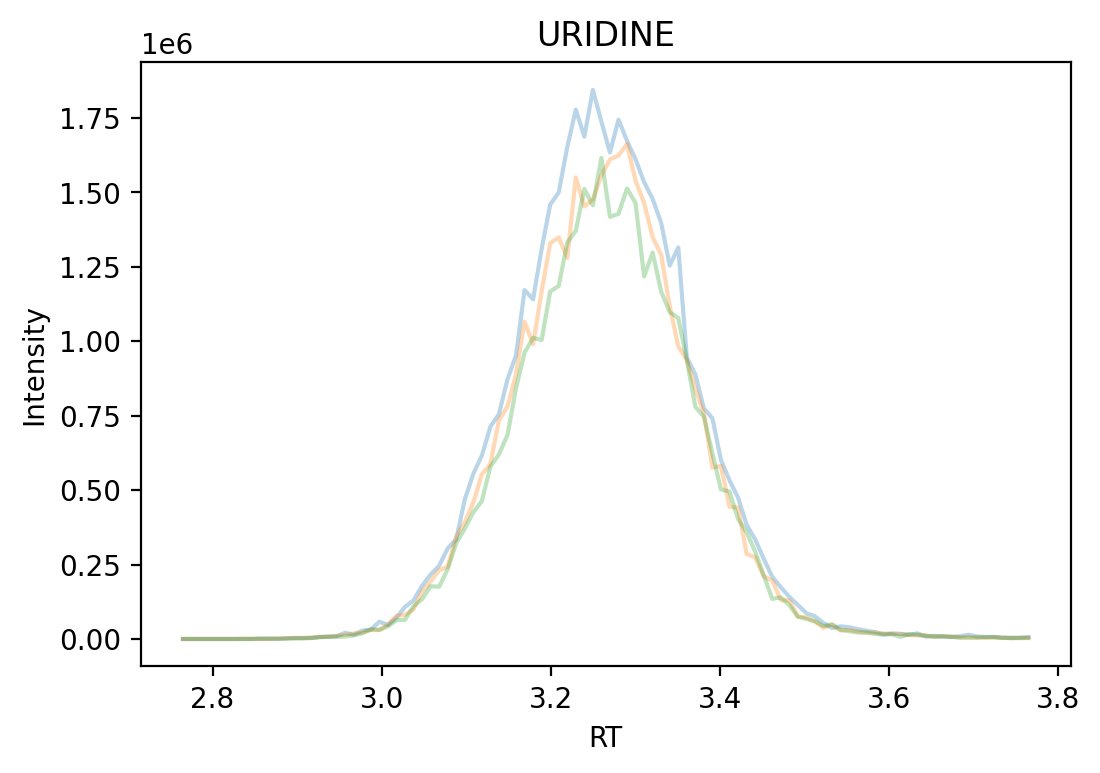

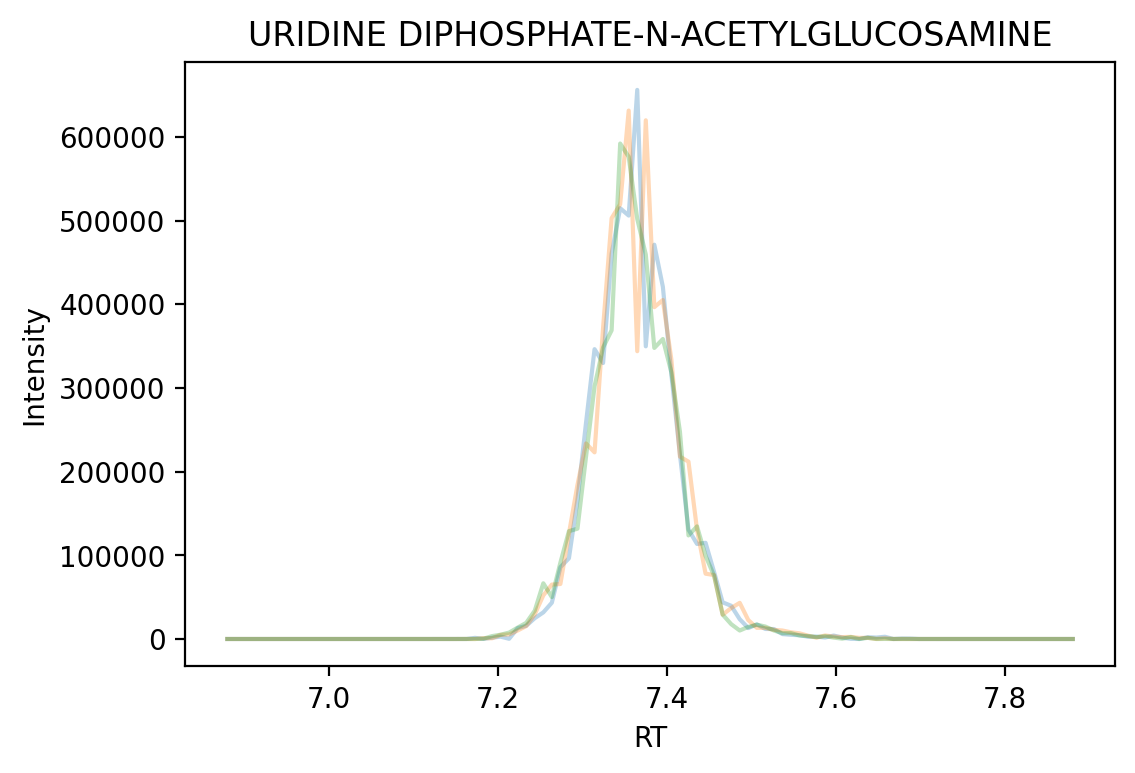

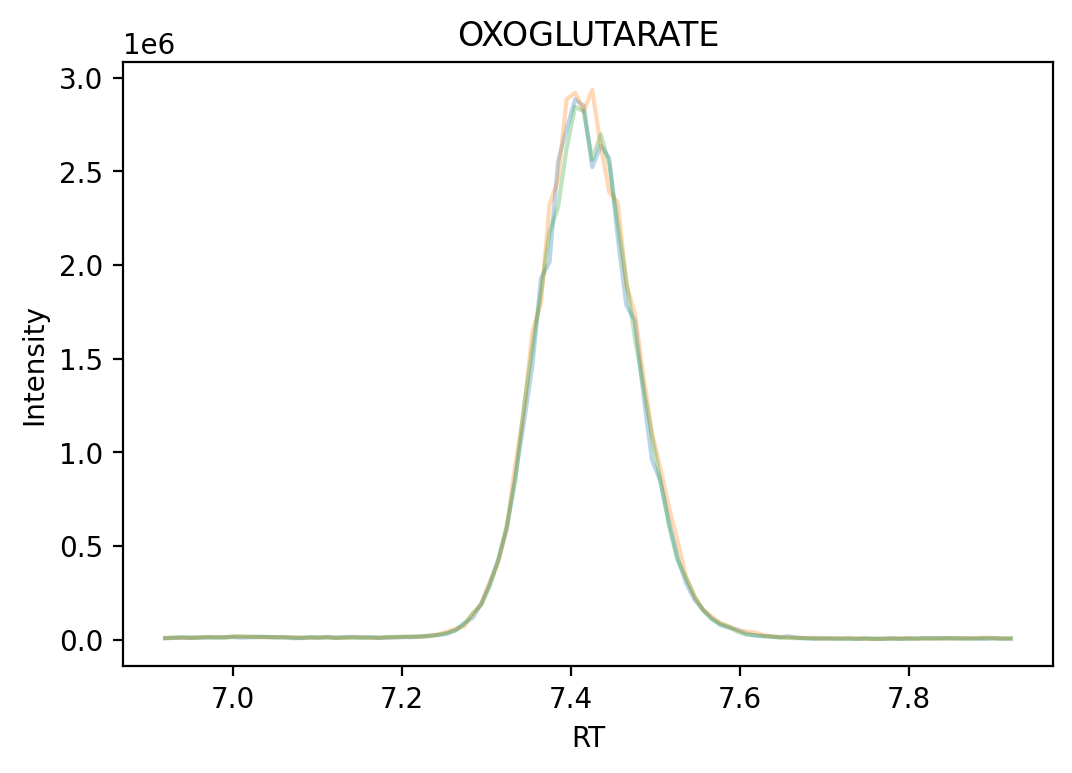

In [58]:
for mz,rt,name in real_peaks:
    if name in corClass["metabolite"].values:
        plt.figure()
        integ.plot_overlayedEIC([raw_data[file] for file in files],mz,rt-.5,rt + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        plt.title(name)

Text(0, 0.5, '% of mixture metabolites ')

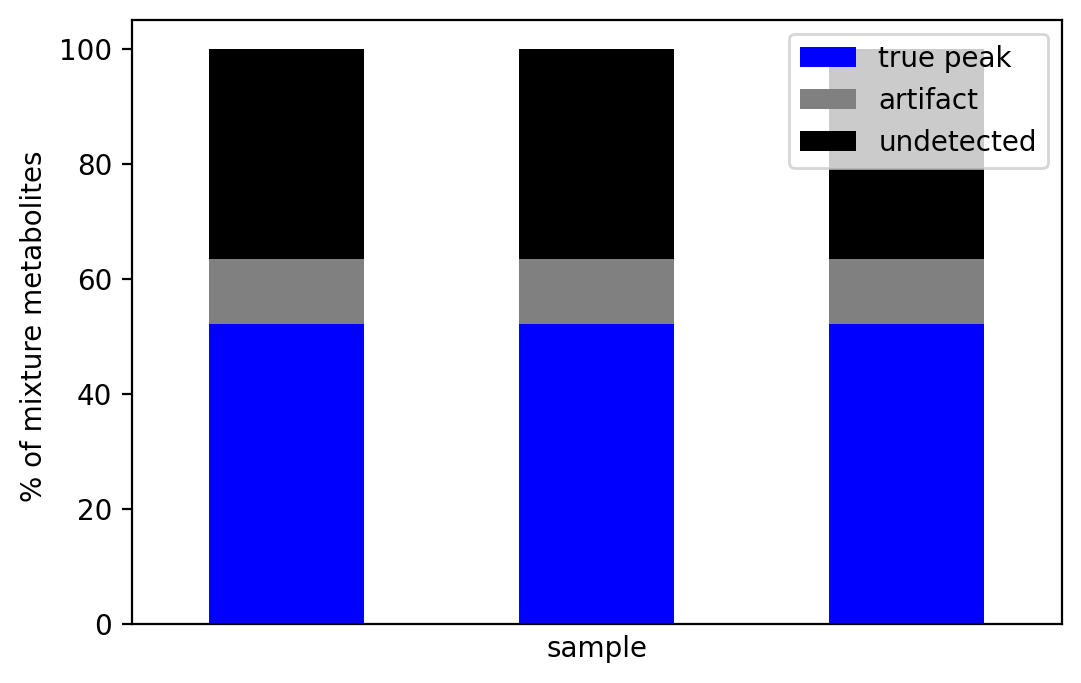

In [59]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["blue","grey","black"])
plt.xticks([],[])
plt.ylabel("% of mixture metabolites ")
